<a href="https://colab.research.google.com/github/ksb7762-k/Dart-B/blob/main/%EC%95%A0%EA%BE%B8%EB%88%88%ED%95%B4%EC%A0%81%EB%8B%A8_%EC%BD%94%EB%93%9C_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**직원들은 왜 회사를 떠나는가**
##부제: 이직 요인 분석을 통한 HR 전략 제안
### 2025.04.02 | TEAM 애꾸눈해적단 | 김서현 조일 강세범 곽주영 김미정

#1️⃣ 문제정의 및 분석목적

**1) 문제정의**

기업의 인재 관리 차원에서, 직원 이탈 문제는 인력 손실과 업무 연속성 문제를 유발하며, 특히 ***신규 입사자의 잦은 이직 현상***은 기업 경쟁력 저하로 직결된다.


**2) 분석목적**

본 분석의 목적은 데이터 기반 분석을 통해 입사 초기 직원의 주요 이직 원인을 파악하고, 이를 바탕으로 효과적인 HR 전략을 수립하는 것이다. 이를 위해 ***조직 문화, 보상 체계, 복리후생과 관련된 지표***를 중점적으로 고려하여 분석을 수행하고자 한다.

#2️⃣ 데이터 불러오기

In [ ]:
import pandas as pd

# 데이터 파일 경로
train_url = "https://raw.githubusercontent.com/bird-one-00/DArt-B_Project/refs/heads/main/train.csv"
test_url = "https://raw.githubusercontent.com/bird-one-00/DArt-B_Project/refs/heads/main/test.csv"

# 데이터 불러오기
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# 데이터 미리보기
print("Train 데이터 (상위 5개 행):")
print(train_df.head())

print("\nTest 데이터 (상위 5개 행):")
print(test_df.head())

# 데이터 크기 확인
print("\n데이터 크기 확인")
print(f"Train 데이터셋 크기: {train_df.shape}")
print(f"Test 데이터셋 크기: {test_df.shape}")

Train 데이터 (상위 5개 행):
   id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...            80                 1   
1                        1  ...            80      

##데이터 소개

1. Age: 직원의 나이

2. Attrition: 직원의 이직 여부 (Yes or No)

3. BusinessTravel: 직원의 출장 빈도 (Non-Travel, Travel_Rarely, Travel_Frequently)

4. DailyRate: 직원의 일일 급여

5. Department: 직원이 속한 부서 (Research & Development, Sales, Human Resources)

6. DistanceFromHome: 직원의 집으로부터 회사까지의 거리

7. Education: 직원의 학력 수준 (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)

8. EducationField: 직원의 전공 분야

9. EmployeeCount: 직원 수 (모든 값이 1로 동일)

10. EmployeeNumber: 직원의 고유 번호

11. EnvironmentSatisfaction: 직원의 업무 환경 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)

12. Gender: 직원의 성별 (Male, Female)

13. HourlyRate: 직원의 시간당 급여

14. JobInvolvement: 직원의 직무 참여도 (1: Low, 2: Medium, 3: High, 4: Very High)

15. JobLevel: 직원의 직급

16. JobRole: 직원의 직무

17. JobSatisfaction: 직원의 직무 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)

18. MaritalStatus: 직원의 결혼 여부 (Single, Married, Divorced)

19. MonthlyIncome: 직원의 월급

20. MonthlyRate: 직원의 월별 급여 총액

21. NumCompaniesWorked: 직원이 근무한 회사 수

22. Over18: 직원이 18세 이상인지 여부 (모든 값이 Y로 동일)

23. OverTime: 직원의 초과 근무 여부 (Yes, No)

24. PercentSalaryHike: 직원의 급여 인상 비율

25. PerformanceRating: 직원의 성과 평가 등급 (1: Low, 2: Good, 3: Excellent, 4: Outstanding)

26. RelationshipSatisfaction: 직원의 동료와의 관계 만족도 (1: Low, 2: Medium, 3: High, 4: Very High)

27. StandardHours: 직원의 표준 근무 시간 (모든 값이 80으로 동일)

28. StockOptionLevel: 직원의 주식 옵션 수준 (0, 1, 2, 3)

29. TotalWorkingYears: 직원의 총 근무 연수

30. TrainingTimesLastYear: 지난해 직원이 받은 교육 횟수

31. WorkLifeBalance: 직원의 일-생활 균형 만족도 (1: Bad, 2: Good, 3: Better, 4: Best)

32. YearsAtCompany: 직원이 현재 회사에서 근무한 기간

33. YearsInCurrentRole: 직원이 현재 역할에서 근무한 기간

34. YearsSinceLastPromotion: 직원의 마지막 승진 이후 경과된 기간

35. YearsWithCurrManager: 직원이 현재 관리자와 함께 일한 기간

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

#3️⃣ 데이터 전처리

##결측치 확인

모든 컬럼에서 결측치 없음

In [ ]:
train_df.isnull().sum()

,0
id,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EnvironmentSatisfaction,0


##이상치 확인

In [ ]:
import numpy as np

def descriptive_statistics(df):
    print("\n[기술 통계 분석]")

    # 불필요한 변수 제거 (모든 값이 동일한 변수)
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    df = df.drop(columns=constant_cols)
    print(f"제거된 상수형 변수: {constant_cols}")

    # 수치형 변수 기술 통계
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("\n[수치형 변수 기술 통계]")
    numeric_stats = df[numeric_cols].describe().T
    numeric_stats['median'] = df[numeric_cols].median()
    numeric_stats['missing_values'] = df[numeric_cols].isnull().sum()
    numeric_stats['unique_values'] = df[numeric_cols].nunique()
    print(numeric_stats)

    # 범주형 변수 기술 통계
    print("\n[범주형 변수 기술 통계]")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n[{col}]")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")
        print(f"Missing values: {df[col].isnull().sum()}")

# 기술 통계 분석 수행
descriptive_statistics(train_df)


[기술 통계 분석]
제거된 상수형 변수: ['EmployeeCount', 'Over18', 'StandardHours']

[수치형 변수 기술 통계]
                           count          mean          std     min     25%  \
id                        1677.0    838.000000   484.252517     0.0   419.0   
Age                       1677.0     36.036971     8.507112    18.0    30.0   
DailyRate                 1677.0    892.749553   374.496259   107.0   589.0   
DistanceFromHome          1677.0      8.683959     7.826143     1.0     2.0   
Education                 1677.0      2.937984     1.039078     1.0     2.0   
EnvironmentSatisfaction   1677.0      2.757901     1.086835     1.0     2.0   
HourlyRate                1677.0     67.798450    19.435928    30.0    51.0   
JobInvolvement            1677.0      2.782349     0.650664     1.0     2.0   
JobLevel                  1677.0      1.998807     1.083065     1.0     1.0   
JobSatisfaction           1677.0      2.791890     1.097396     1.0     2.0   
MonthlyIncome             1677.0   6196.049493

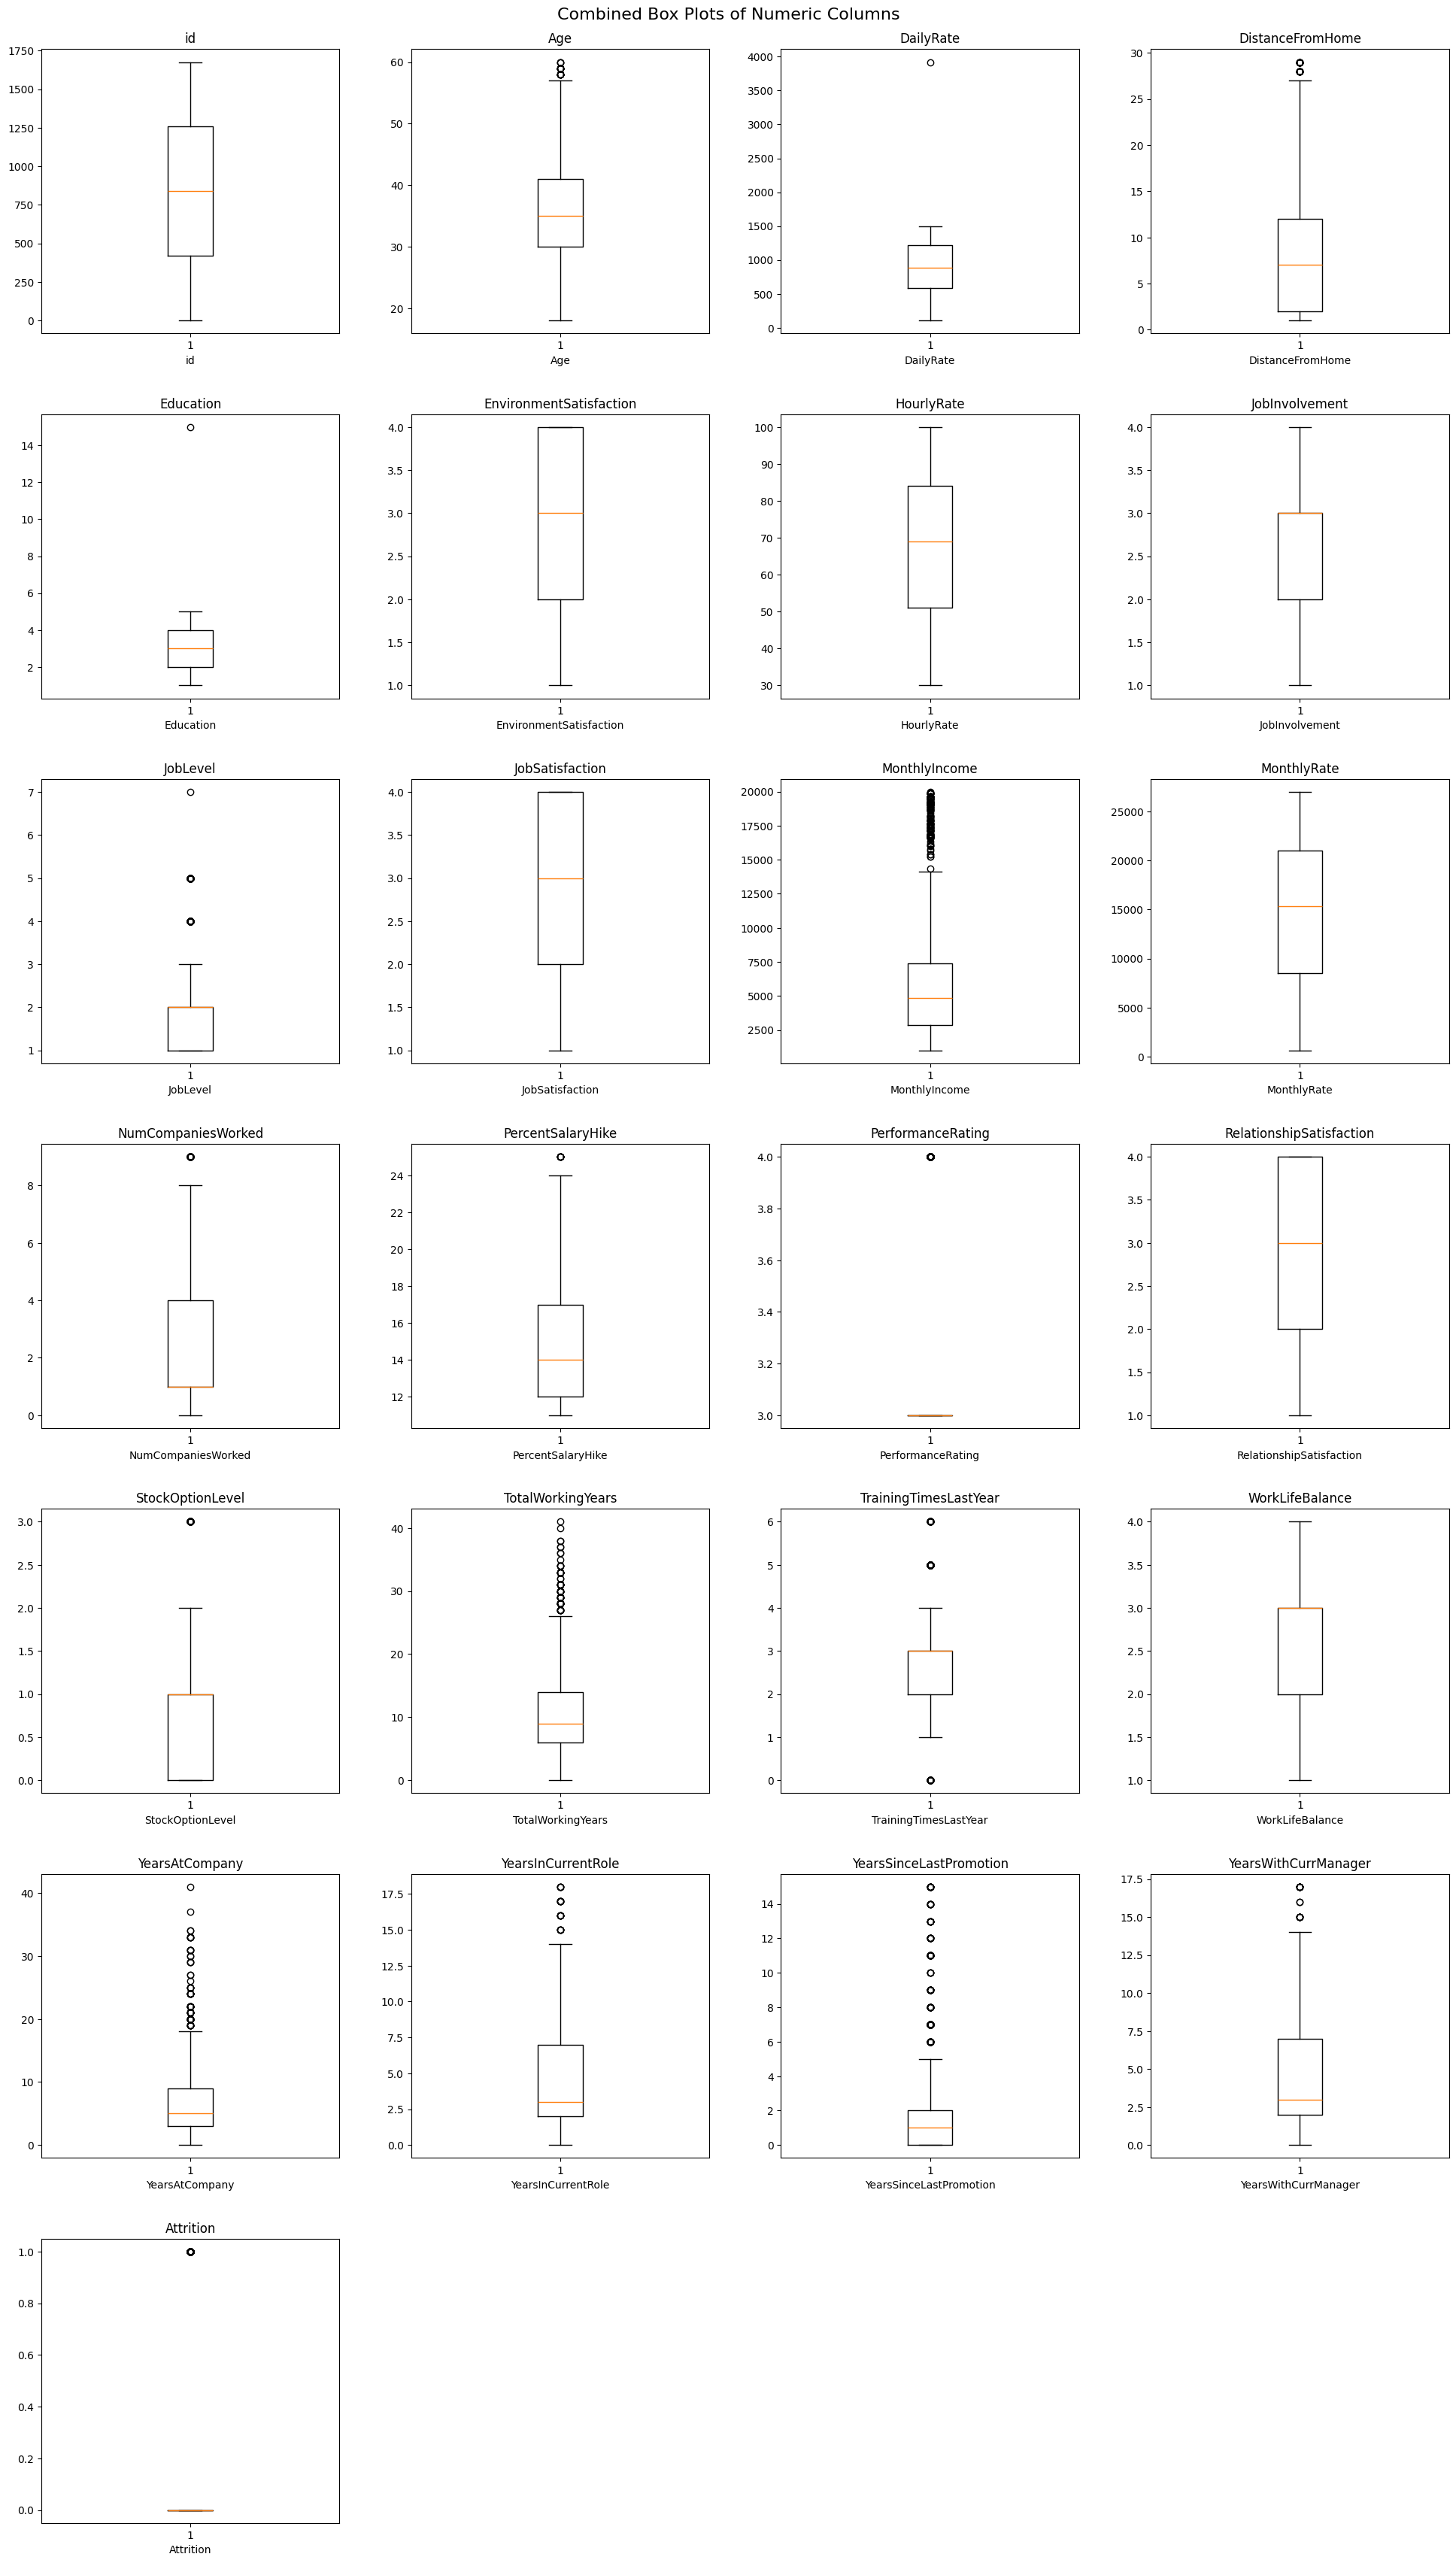

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_combined_boxplots(df):
    # 수치형 변수 필터링
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # 상수형 변수 제거
    numeric_cols = [col for col in numeric_cols if df[col].nunique() > 1]

    # 행렬 형태로 서브플롯 구성
    num_cols = len(numeric_cols)
    nrows = math.ceil(num_cols / 4)  # 한 행에 최대 4개씩 배치
    ncols = min(4, num_cols)

    plt.figure(figsize=(ncols * 5, nrows * 5))
    plt.suptitle("Combined Box Plots of Numeric Columns", fontsize=16)

    for i, col in enumerate(numeric_cols):
        plt.subplot(nrows, ncols, i + 1)
        plt.boxplot(df[col].dropna())
        plt.title(col)
        plt.xlabel(col)

    plt.tight_layout(pad=3.0)
    plt.show()

# Box Plot 시각화
plot_combined_boxplots(train_df)

In [ ]:
# 왜도 확인
def check_skewness(df, columns):
    print("\n[컬럼별 왜도 값]")
    skew_values = df[columns].skew()
    skew_df = pd.DataFrame(skew_values, columns=['Skewness'])
    skew_df['Skewness_Interpretation'] = skew_df['Skewness'].apply(
        lambda x: 'High Right Skew (Positive)' if x > 1 else
                  'Moderate Right Skew' if 0.5 < x <= 1 else
                  'Symmetric' if -0.5 <= x <= 0.5 else
                  'Moderate Left Skew' if -1 <= x < -0.5 else
                  'High Left Skew (Negative)'
    )
    print(skew_df)

# 왜도 확인이 필요한 컬럼 리스트
skew_cols = [
    'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
    'PercentSalaryHike', 'PerformanceRating', 'JobLevel'
]

# 왜도 확인
check_skewness(train_df, skew_cols)


[컬럼별 왜도 값]
                         Skewness     Skewness_Interpretation
MonthlyIncome            1.551410  High Right Skew (Positive)
MonthlyRate             -0.061418                   Symmetric
TotalWorkingYears        1.145234  High Right Skew (Positive)
YearsAtCompany           1.738288  High Right Skew (Positive)
YearsInCurrentRole       0.942663         Moderate Right Skew
YearsSinceLastPromotion  2.080754  High Right Skew (Positive)
YearsWithCurrManager     0.817765         Moderate Right Skew
PercentSalaryHike        0.914510         Moderate Right Skew
PerformanceRating        2.234200  High Right Skew (Positive)
JobLevel                 1.170339  High Right Skew (Positive)


일부 컬럼에서 왜도가 높은 경우가 확인되었으나 (MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, PerformanceRating, JobLevel 등), 해당 컬럼의 특성상 급여나 근무 연수, 직급 등의 변수는 도메인 지식을 고려할 때 자연스럽게 왜도가 발생할 수 있는 변수임. 따라서 이러한 분포를 비정상적 데이터로 판단하기 어려워 이상치로 간주하지 않았음.

##정보량이 없는 열 제거

정보량이 없는 4개의 열을 제거했음. 제거한 열은 아래와 같음.
1. EmployeeCount: 직원 수 (모든 값이 1로 동일)
2. EmployeeNumber: 직원의 고유 번호 (식별자)
3. Over18: 직원이 18세 이상인지 여부 (모든 값이 Y로 동일)
4. StandardHours: 직원의 표준 근무 시간 (모든 값이 80으로 동일)

In [ ]:
def remove_irrelevant_columns(df):
    # 제거할 열 목록
    cols_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

    # 열 제거
    df = df.drop(columns=cols_to_remove, errors='ignore')
    print(f"제거한 열: {cols_to_remove}")
    print(f"제거 후 데이터프레임 형태: {df.shape}")
    return df

# 정보량이 없는 열 제거
train_df = remove_irrelevant_columns(train_df)
print(train_df.head())

제거한 열: ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
제거 후 데이터프레임 형태: (1677, 32)
   id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                24          3        Medical                        4   
1                 8          3          Other                        1   
2                26          3      Marketing                        3   
3                 2          3        Medical                        3   
4                 5          4        Medical                        2   

   Gender  ...  RelationshipSatisfaction  StockOp

##논리적 오류가 있는 행 제거

데이터 내 32개의 논리 오류 행을 제거함.

데이터 내 논리적 오류가 있는 경우를 다음 세 가지 케이스로 구분함

**1. YearsAtCompany보다 YearsWithCurrManager가 더 큰 경우**
- 현재 관리자와 함께한 시간이 회사 전체 근무 기간보다 길 수는 없음
- 오류 발견 건수: 6건
- 2년 이상의 차이가 있는 경우에 한해 2건 제거

**2. NumCompaniesWorked == 0인데 TotalWorkingYears와 YearsAtCompany의 차이가 1년을 초과하는 경우**
- 이직 경험이 없다면 전체 경력과 현재 회사 근속 연수는 같아야 함
- 오류 발견 건수: 30건
        
**3. YearsInCurrentRole이 YearsAtCompany보다 큰 경우**
- 회사에서 일한 전체 시간보다 특정 직무에서의 근무 기간이 더 길 수는 없음
- 오류 발견 건수: 1건
- 2년 이상의 차이가 없어 제거하지 않음
        
    
**※ 처리 기준**
- 논리적 오류가 있는 행 중에서 **2년 이상의 차이**가 발생하는 경우에만 제거함
- HR 데이터 분석에서는 경력 계산 시 허용 오차 범위를 두는 것이 필요하기 때문. 회사 내부 시스템에 따라 경력 관리 방식이 다를 수 있어, 지나치게 엄격한 기준을 적용할 경우 중요한 샘플이 제거될 수 있음
- 최종적으로 **32건의 논리 오류 행을 제거**함

In [ ]:
#논리 오류가 있는 컬럼 제거 전
train_df.shape

(1677, 32)

In [ ]:
import pandas as pd

def remove_logical_errors(df):
    """
    데이터 내 논리 오류 행을 제거하는 함수
    오류 유형: 3가지 논리 오류
    - 오류 유형 1: YearsAtCompany < YearsWithCurrManager (2년 이상 차이 시 제거)
    - 오류 유형 2: NumCompaniesWorked == 0인데 TotalWorkingYears - YearsAtCompany > 1년 (제거)
    - 오류 유형 3: YearsInCurrentRole > YearsAtCompany (2년 이상의 차이 없음, 제거하지 않음)
    """
    initial_count = len(df)
    print(f"초기 데이터 행 개수: {initial_count}")

    # 오류 유형 1: 현재 관리자와 함께한 시간이 회사 근무 기간보다 긴 경우 (2년 이상 차이만 제거)
    condition1 = (df['YearsWithCurrManager'] - df['YearsAtCompany'] > 2)
    error_count1 = df[condition1].shape[0]
    print(f"오류 유형 1 (YearsWithCurrManager > YearsAtCompany + 2) 발견 건수: {error_count1}")

    # 오류 유형 2: 이직 경험이 없는데 전체 경력과 회사 근속 연수 차이가 1년 초과
    condition2 = (df['NumCompaniesWorked'] == 0) & ((df['TotalWorkingYears'] - df['YearsAtCompany']).abs() > 1)
    error_count2 = df[condition2].shape[0]
    print(f"오류 유형 2 (이직 경험 없음 & 근속 연수 차이 > 1년) 발견 건수: {error_count2}")

    # 오류 유형 3: 현재 역할에서의 근속 기간이 회사 근속 연수보다 긴 경우 (2년 이상의 차이 없음)
    condition3 = (df['YearsInCurrentRole'] - df['YearsAtCompany'] > 2)
    error_count3 = df[condition3].shape[0]
    print(f"오류 유형 3 (YearsInCurrentRole > YearsAtCompany + 2) 발견 건수: {error_count3} (제거하지 않음)")

    # 논리 오류 행 제거 (조건 1과 조건 2)
    error_rows = condition1 | condition2
    cleaned_df = df[~error_rows]

    # 제거 후 데이터 개수 확인
    final_count = len(cleaned_df)
    removed_count = initial_count - final_count
    print(f"제거된 논리 오류 행 개수: {removed_count}")
    print(f"최종 데이터 행 개수: {final_count}")

    return cleaned_df

# 논리 오류 행 제거 실행
train_df = remove_logical_errors(train_df)

초기 데이터 행 개수: 1677
오류 유형 1 (YearsWithCurrManager > YearsAtCompany + 2) 발견 건수: 2
오류 유형 2 (이직 경험 없음 & 근속 연수 차이 > 1년) 발견 건수: 30
오류 유형 3 (YearsInCurrentRole > YearsAtCompany + 2) 발견 건수: 0 (제거하지 않음)
제거된 논리 오류 행 개수: 32
최종 데이터 행 개수: 1645


In [ ]:
#논리 오류가 있는 컬럼 제거 후
train_df.shape

(1645, 32)

##파생 변수 생성

###급여 관련 파생 변수
**SalaryGapRatio**

- 실제 수령액이 기본급과 얼마나 차이가 나는지, 상대적으로 얼마나 큰 갭이 있는지 확인하기 위해 위와 같은 급여 관련 파생 변수를 생성함
- 기본급 대비 차이를 상대적인 비율로 표현하기 위해 분모에 MonthlyIncome을 넣었음
- SalaryGapRatio = 기본급과 실제 수령액 간의 차이를 기본급 대비 비율로 표현한 값 = (MonthlyRate - MonthlyIncome) / MonthlyIncome

In [ ]:
def create_salary_gap_ratio(df):
    # SalaryGapRatio 계산: (MonthlyRate - MonthlyIncome) / MonthlyIncome
    df['SalaryGapRatio'] = (df['MonthlyRate'] - df['MonthlyIncome']) / df['MonthlyIncome']
    print("SalaryGapRatio 파생변수가 생성되었습니다.")
    print(df[['MonthlyRate', 'MonthlyIncome', 'SalaryGapRatio']].head())
    return df

# 파생변수 생성
train_df = create_salary_gap_ratio(train_df)

SalaryGapRatio 파생변수가 생성되었습니다.
   MonthlyRate  MonthlyIncome  SalaryGapRatio
0         5099           2596        0.964176
1        10778           2899        2.717834
2        16495           4627        2.564945
3        13384           5347        1.503086
4        19805          19033        0.040561


<ipython-input-11-a9d1924986d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalaryGapRatio'] = (df['MonthlyRate'] - df['MonthlyIncome']) / df['MonthlyIncome']


###입사 시기 관련 파생 변수
**TenureEmployee**

- 직원의 근속 기간을 단기, 중기, 장기로 구분하여 근속 연수에 따른 특성 차이를 확인하기 위해 위와 같은 입사 시기 관련 파생 변수를 생성함
- 근속 연수의 범위를 **단기(0), 중기(1), 장기(2)**로 구분하여 분석의 편의성을 높이기 위해 해당 범주형 변수를 생성함
- TenureEmployee = 입사 시기에 따른 근속 구분 변수 =
 - 0 (단기): YearsAtCompany가 0, 1, 2일 때
 - 1 (중기): YearsAtCompany가 3, 4, 5, 6일 때
 - 2 (장기): YearsAtCompany가 7 이상일 때
- 아래의 분석 결과를 참고하여 단기, 중기, 장기 연도의 기준을 설정함

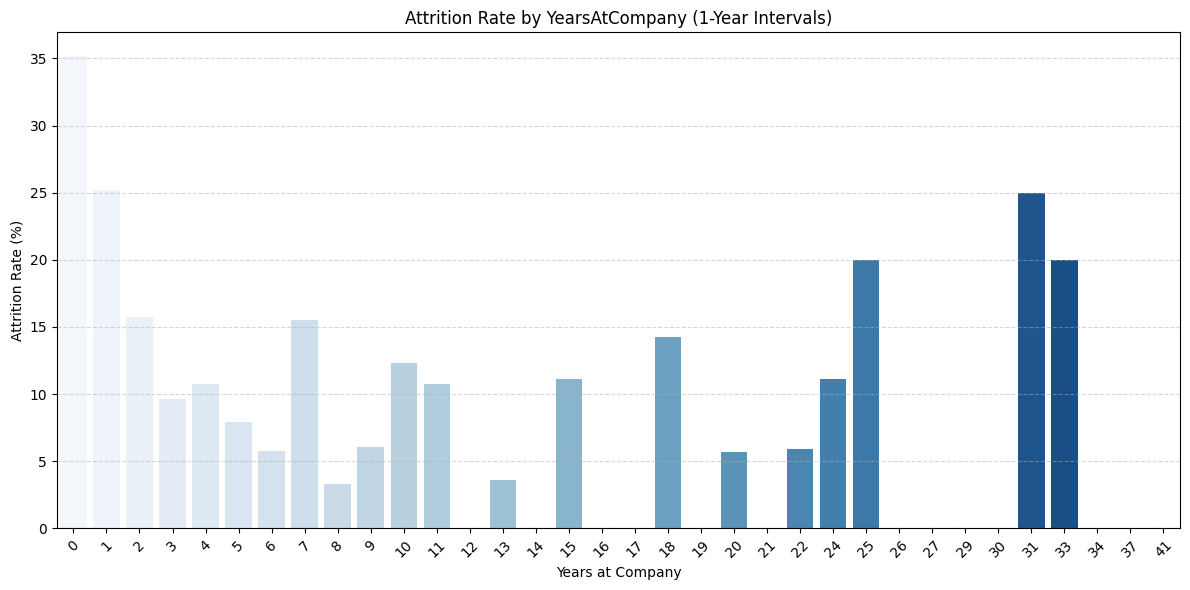

In [ ]:
def create_tenure_employee(df):
    # TenureEmployee 생성
    df['TenureEmployee'] = df['YearsAtCompany'].apply(lambda x: 0 if x <= 2 else (1 if 3 <= x <= 6 else 2))
    print("TenureEmployee 파생변수가 생성되었습니다.")
    print(df[['YearsAtCompany', 'TenureEmployee']].head())
    return df

# 파생변수 생성
train_df = create_tenure_employee(train_df)

TenureEmployee 파생변수가 생성되었습니다.
   YearsAtCompany  TenureEmployee
0              10               2
1               4               1
2               3               1
3               6               1
4              31               2


<ipython-input-12-e9a2198af9c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TenureEmployee'] = df['YearsAtCompany'].apply(lambda x: 0 if x <= 2 else (1 if 3 <= x <= 6 else 2))


#4️⃣ EDA

35개 column 중 유의미한 변수와 파생변수(SalaryGapRatio, TenureEmployee)를 포함하여 **5개의 주제별로 분석을 진행**함

##**선정한 지표**

1. **근속 기간 지표 (6개) (초기 입사자 구별 목적)**
- `YearsAtCompany`: 회사에서 근무한 기간을 통해 3년차 미만을 구분할 수 있음.
- `YearsInCurrentRole`: 현재 역할에서 근무한 기간이 짧은 경우 초기 입사자일 가능성이 높음.
- `YearsSinceLastPromotion`: 승진이 없는 경우 초기 입사자의 특성일 가능성 있음.
- `YearsWithCurrManager`: 동일 관리자와의 근무 기간이 짧은 경우 초기 입사자일 가능성 있음.
- `TotalWorkingYears`: 입사 초기이므로 총 근무 경력도 비교적 짧을 가능성이 있음.
- `TenureEmployee` : 단기(WorkAtCompany 0\~2년), 중기(3~6년), 장기(7년 이상)

2. **직무 만족도 및 환경 관련 지표 (6개)**
- `JobSatisfaction`: 직무 만족도가 낮다면 이직 가능성이 높음.
- `EnvironmentSatisfaction`: 업무 환경이 열악할 경우 이직 가능성이 높음.
- `JobInvolvement`: 직무 참여도가 낮다면 이직 가능성이 높음.
- `WorkLifeBalance`: 일-생활 균형이 맞지 않으면 이직 가능성이 높음.
- `PerformanceRating`: 성과 평가 등급이 낮을 경우 이직 가능성이 높음.
- `RelationshipSatisfaction`: 동료와의 관계가 원만하지 않다면 이직 가능성이 높음.

3. **보상 및 급여 관련 지표 (5개)**
- `MonthlyIncome`: 급여가 적다면 이직 가능성이 높음.
- `HourlyRate`: 시간당 급여가 낮은 경우 이직 가능성이 있음.
- `PercentSalaryHike`: 급여 인상률이 낮다면 불만족 요인이 될 수 있음.
- `SalaryGapRatio`: 기본급 대비 실제 수령액의 차이가 큰 경우 불만족으로 인한 이직 가능성이 있음. SalaryGapRatio = 기본급과 실제 수령액 간의 차이를 기본급 대비 비율로 표현한 값 = (MonthlyRate - MonthlyIncome) / MonthlyIncome
- `StockOptionLevel`: 주식 옵션 수준이 낮다면 이직 가능성이 높음.

4. **개인적 요인 (3개)**
- `Age`: 젊은 직원일수록 이직 가능성이 높을 수 있음.
- `MaritalStatus`: 결혼 여부에 따라 이직 의향이 다를 수 있음.
- `Gender`: 성별에 따라 이직 경향이 다를 수 있음.

5. **업무 관련 요인 (3가지)**
- `OverTime`: 초과 근무가 많을 경우 이직 가능성이 높음.
- `BusinessTravel`: 출장 빈도가 잦다면 이직 가능성이 있음.
- `NumCompaniesWorked`: 이직 경험이 많은 경우 다시 이직할 가능성이 있음.

##1) 근속 기간에 따른 이직률 분석

- 5가지 지표 모두 통계적으로 유의미한 차이가 있었음
- 이직(Attrition)을 한 직원들은 회사에 근속한 기간(YearsAtCompany)이 상대적으로 `짧았음`
- 현재 직무에서의 근속 연수(YearsInCurrentRole), 현재 상사와 함께 근무한 연수(YearsWithCurrManager), 총 경력 기간(TotalWorkingYears) 역시 이직한 직원들이 뚜렷하게 `짧았음`
- 마지막 승진 이후 기간(YearsSinceLastPromotion)도 두 그룹 간 유의미한 차이가 있었으나, 차이가 상대적으로 작았음

<ipython-input-13-ca2a7e5d78ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-13-ca2a7e5d78ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-13-ca2a7e5d78ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-13-ca2a7e5d78ad>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

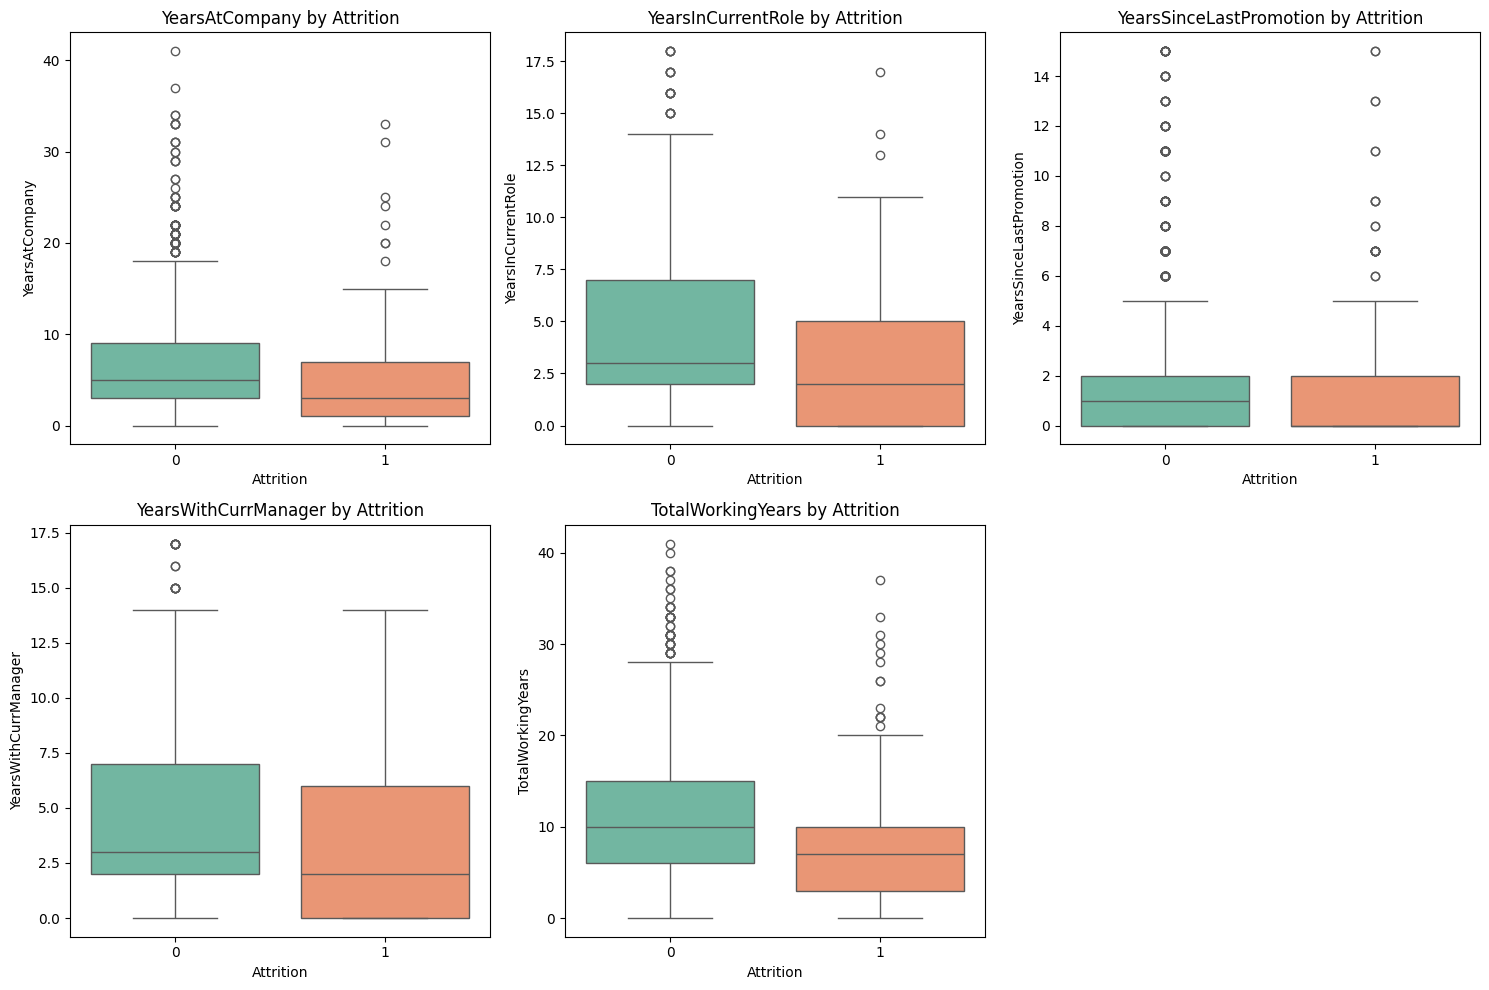

Statistical Significance Test Results (Mann-Whitney U Test):
YearsAtCompany: U-statistic=101272.50, p-value=0.0000 --> Significant
YearsInCurrentRole: U-statistic=105323.00, p-value=0.0000 --> Significant
YearsSinceLastPromotion: U-statistic=126547.50, p-value=0.0092 --> Significant
YearsWithCurrManager: U-statistic=106487.50, p-value=0.0000 --> Significant
TotalWorkingYears: U-statistic=102142.50, p-value=0.0000 --> Significant


In [ ]:
import seaborn as sns
from scipy.stats import mannwhitneyu

# 변수 리스트
variables = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
             'YearsWithCurrManager', 'TotalWorkingYears']

# Attrition 값에 따라 데이터 분리
attrition_yes = train_df[train_df['Attrition'] == 1]
attrition_no = train_df[train_df['Attrition'] == 0]

# 시각화 설정
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
    plt.title(f'{var} by Attrition')

plt.tight_layout()
plt.show()

# 통계적 유의성 검정 (Mann-Whitney U Test)
print("Statistical Significance Test Results (Mann-Whitney U Test):")
for var in variables:
    stat, p = mannwhitneyu(attrition_yes[var], attrition_no[var], alternative='two-sided')
    print(f"{var}: U-statistic={stat:.2f}, p-value={p:.4f}",
          "--> Significant" if p < 0.05 else "--> Not Significant")

##2) 직무 만족도 및 환경에 따른 이직률 분석

- 직무 참여도(JobInvolvement)와 업무 환경(EnvironmentSatisfaction)은 이직률과 매우 뚜렷한 연관성을 보임. 이는 직원이 조직 내 업무와 환경에서 `소속감`이나 `몰입감`을 느낄 때 이직 가능성이 낮아진다는 것을 시사함
- 동료와의 관계(RelationshipSatisfaction)역시 조직에 대한 `소속감`을 형성하는 데 중요한 요소임. 따라서 조직 내 커뮤니케이션 및 관계 개선 활동이 직원 유지에 긍정적으로 작용할 가능성이 큼
- 예상밖의 결과로, 업무 관련 주관적인 평가가 담긴 WorkLifeBalance(일과 삶의 균형)과 PerformanceRating(성과 평가 등급), 직무만족도(JobSatisfaction)는 직접적인 이직률에 미치는 영향이 상대적으로 낮음

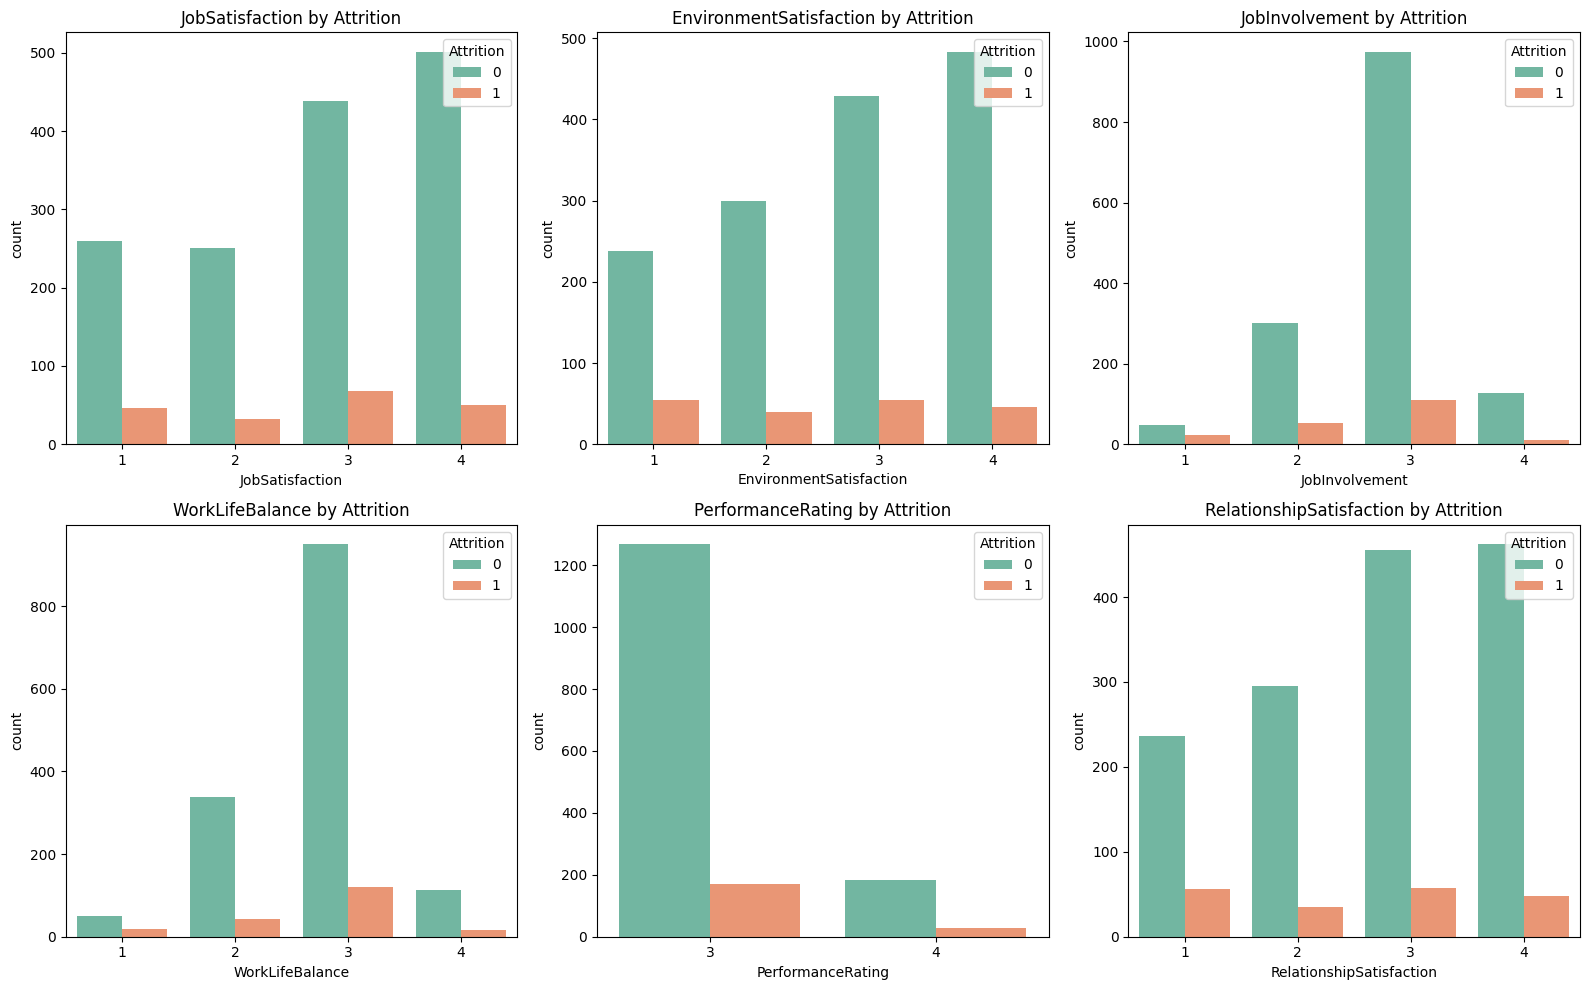

Statistical Significance Test Results (Mann-Whitney U Test):
JobSatisfaction: U-statistic=127797.00, p-value=0.0178 --> Significant
EnvironmentSatisfaction: U-statistic=118922.50, p-value=0.0001 --> Significant
JobInvolvement: U-statistic=116577.00, p-value=0.0000 --> Significant
WorkLifeBalance: U-statistic=135257.00, p-value=0.2005 --> Not Significant
PerformanceRating: U-statistic=143727.50, p-value=0.6318 --> Not Significant
RelationshipSatisfaction: U-statistic=121757.50, p-value=0.0008 --> Significant


In [ ]:
# 분석할 변수 목록
variables = ['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement',
             'WorkLifeBalance', 'PerformanceRating', 'RelationshipSatisfaction']

# Attrition 값에 따라 데이터 분리
attrition_yes = train_df[train_df['Attrition'] == 1]
attrition_no = train_df[train_df['Attrition'] == 0]

# 시각화 설정
plt.figure(figsize=(16, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=var, hue='Attrition', data=train_df, palette='Set2')
    plt.title(f'{var} by Attrition')
    plt.legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

# 통계적 유의성 검정 (Mann-Whitney U Test)
print("Statistical Significance Test Results (Mann-Whitney U Test):")
for var in variables:
    stat, p = mannwhitneyu(attrition_yes[var], attrition_no[var], alternative='two-sided')
    result = "Significant" if p < 0.05 else "Not Significant"
    print(f"{var}: U-statistic={stat:.2f}, p-value={p:.4f} --> {result}")

##3) 보상 및 급여에 따른 이직률 분석

- 직원들의 이직률은 보상 수준과 명확한 관련이 있음. 특히, 실제로 손에 들어오는 급여(MonthlyIncome)와 급여 인상률(PercentSalaryHike)은 직원들이 조직에 남아있을지 이직할지 결정하는 매우 중요한 요소로 작용함
- SalaryGapRatio(지급된 급여와 기대 급여 간의 격차)가 높을 경우 이직률이 높아진다는 점은 직원들이 실제 보상과 기대 보상 사이의 괴리에 민감하게 반응한다는 것을 의미함. 이는 회사가 급여 정책의 투명성 및 공정성을 높여야 한다는 시사점을 제공할 수 있음.
- StockOptionLevel이 낮으면 이직률이 높은 것으로 나타났기 때문에, 현재 주어지는 금전적 보상뿐만 아니라 미래에 기대되는 금전적 보상에도 반응한다! (이직 결정에 영향을 준다)
- 반면, HourlyRate(시간당 급여)는 통계적으로 유의미하지 않았음

<ipython-input-15-cebcd05f57f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-15-cebcd05f57f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-15-cebcd05f57f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
<ipython-input-15-cebcd05f57f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

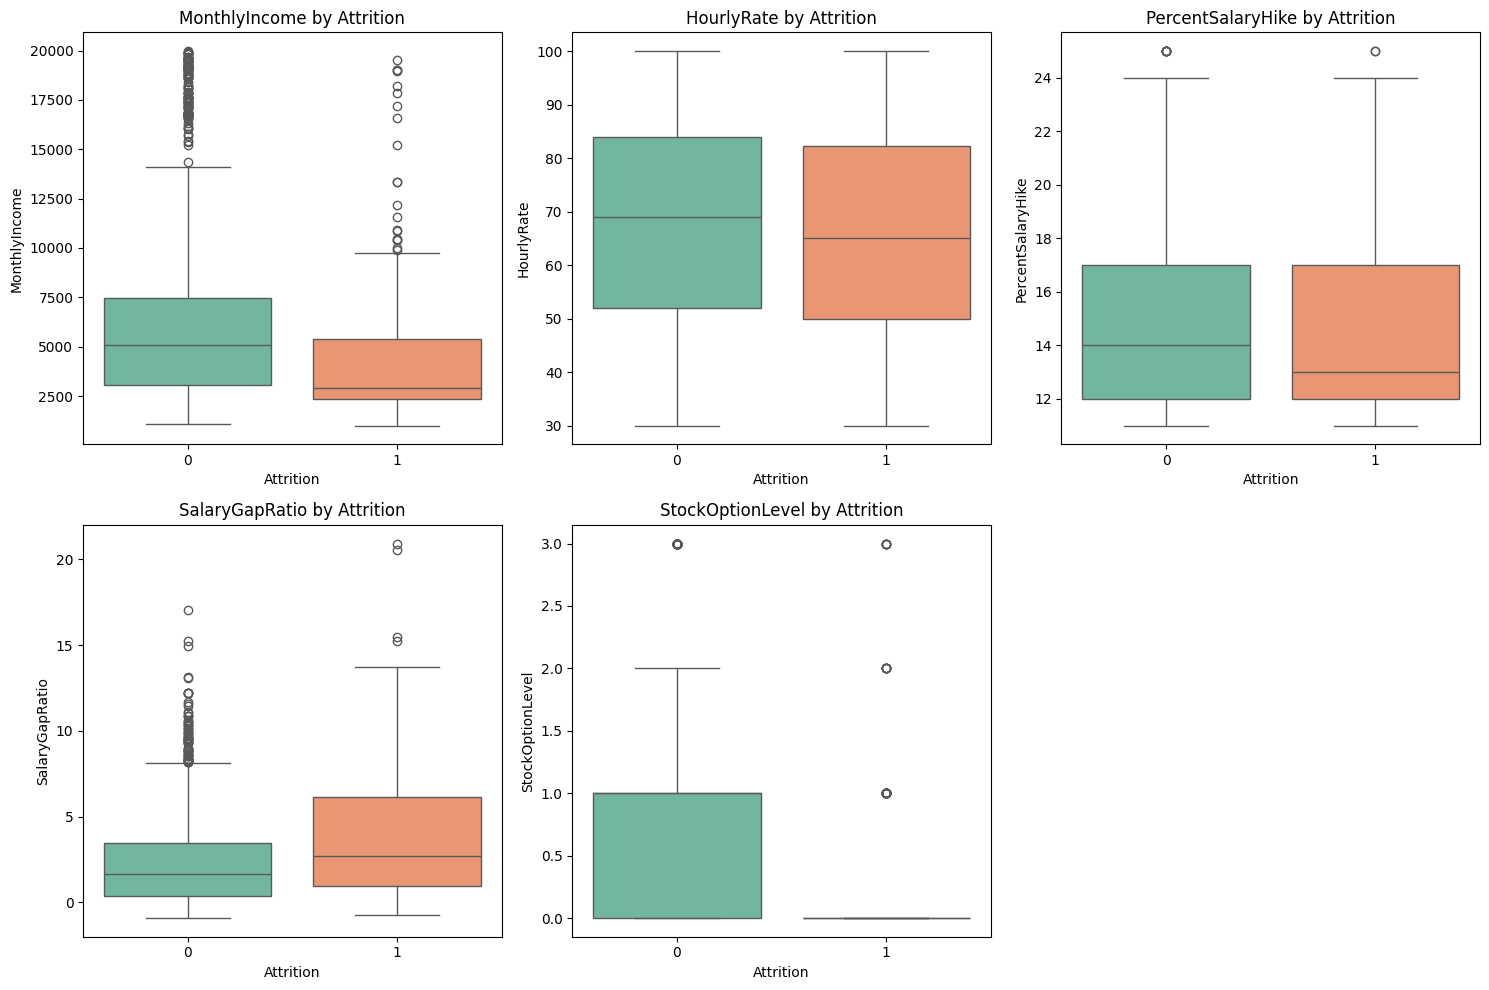

Statistical Significance Test Results (Mann-Whitney U Test):
MonthlyIncome: U-statistic=96405.50, p-value=0.0000 --> Significant
HourlyRate: U-statistic=132005.00, p-value=0.1092 --> Not Significant
PercentSalaryHike: U-statistic=127466.50, p-value=0.0190 --> Significant
SalaryGapRatio: U-statistic=173617.00, p-value=0.0000 --> Significant
StockOptionLevel: U-statistic=89740.00, p-value=0.0000 --> Significant


In [ ]:
# 분석할 급여 관련 변수 목록
salary_vars = ['MonthlyIncome', 'HourlyRate', 'PercentSalaryHike', 'SalaryGapRatio', 'StockOptionLevel']

# Attrition 여부로 데이터 분리
attrition_yes = train_df[train_df['Attrition'] == 1]
attrition_no = train_df[train_df['Attrition'] == 0]

# 시각화
plt.figure(figsize=(15, 10))
for i, var in enumerate(salary_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Attrition', y=var, data=train_df, palette="Set2")
    plt.title(f'{var} by Attrition')

plt.tight_layout()
plt.show()

# 통계적 유의성 검정 (Mann-Whitney U Test)
print("Statistical Significance Test Results (Mann-Whitney U Test):")
for var in salary_vars:
    stat, p = mannwhitneyu(attrition_yes[var], attrition_no[var], alternative='two-sided')
    result = "Significant" if p < 0.05 else "Not Significant"
    print(f"{var}: U-statistic={stat:.2f}, p-value={p:.4f} --> {result}")

##4) 개인적 요인에 따른 이직률 분석

- `연령이 낮은` 직원들은 상대적으로 이직 가능성이 높으며, 이는 젊은 직원들이 경력 초기 단계에서 더 좋은 기회를 찾기 위해(→ 본인 기준에 족하는 회사를 찾기 위해..?) 조직을 이동하는 경향이 있음을 시사함
- `미혼`(Single)인 직원들이 다른 결혼 상태 그룹보다 이직률이 높게 나타남. 이는 개인적인 `책임감`이나 `가정의 안정성` 등의 요인이 이직 의사결정에 상당한 영향을 미칠 수 있음을 보여줌
- 한편, 성별(Gender)은 이직률에 있어 유의미한 영향을 미치지 않았음

<ipython-input-16-4fa9cd1983c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=train_df, palette='Set2')


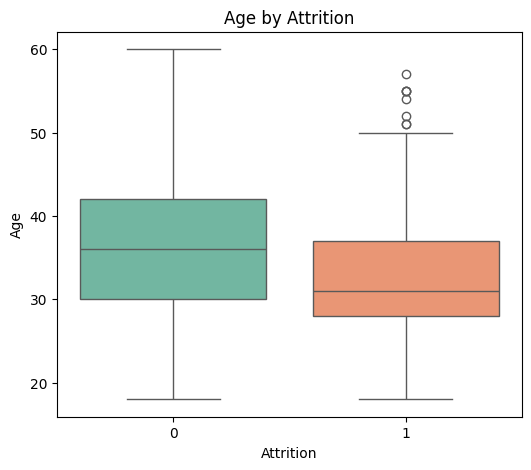

Age Mann-Whitney U Test: U-statistic=99045.50, p-value=0.0000 --> Significant


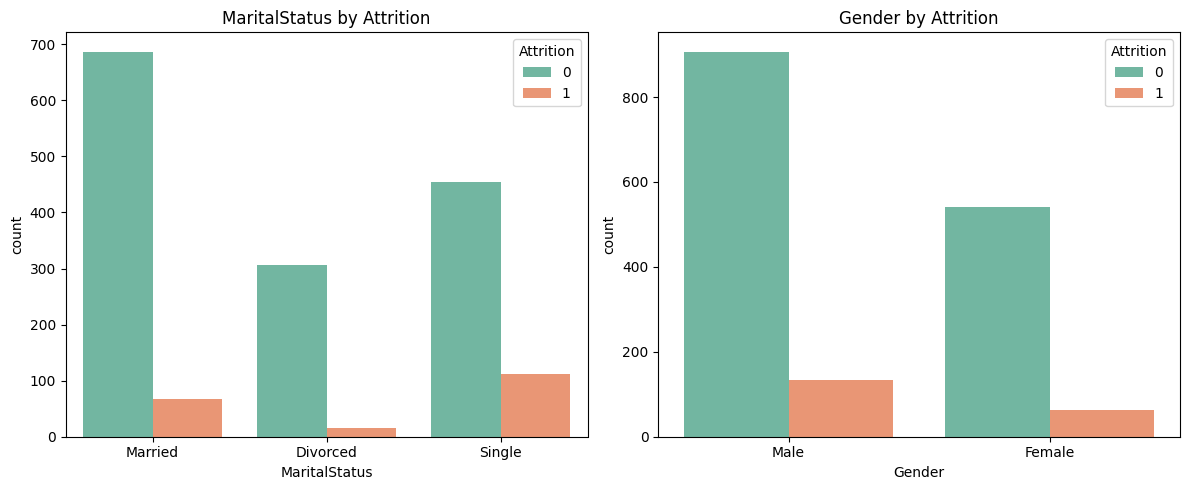


Chi-Square Test Results:
MaritalStatus: Chi-square=54.19, p-value=0.0000 --> Significant
Gender: Chi-square=2.23, p-value=0.1350 --> Not Significant


In [ ]:
from scipy.stats import chi2_contingency

# 연속형 변수(Age) 시각화 및 검정
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition', y='Age', data=train_df, palette='Set2')
plt.title('Age by Attrition')
plt.show()

# Mann-Whitney U test for Age
attrition_yes = train_df[train_df['Attrition'] == 1]['Age']
attrition_no = train_df[train_df['Attrition'] == 0]['Age']
stat, p = mannwhitneyu(attrition_yes, attrition_no, alternative='two-sided')
print(f"Age Mann-Whitney U Test: U-statistic={stat:.2f}, p-value={p:.4f} -->",
      "Significant" if p < 0.05 else "Not Significant")

# 범주형 변수(MaritalStatus, Gender) 시각화 및 검정
categorical_vars = ['MaritalStatus', 'Gender']

plt.figure(figsize=(12,5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, hue='Attrition', data=train_df, palette='Set2')
    plt.title(f'{var} by Attrition')

plt.tight_layout()
plt.show()

# Chi-Square Test for categorical variables
print("\nChi-Square Test Results:")
for var in categorical_vars:
    contingency_table = pd.crosstab(train_df[var], train_df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: Chi-square={chi2:.2f}, p-value={p:.4f} -->",
          "Significant" if p < 0.05 else "Not Significant")

##5) 업무에 따른 이직률 분석

- `초과근무`(OverTime)와 `출장 빈도`(BusinessTravel)는 직원들의 이직 결정에 강한 영향을 미치는 요소임
- 특히 초과근무를 많이 하는 직원은 스트레스나 업무 부담 증가로 인해 이직할 가능성이 높음
- 출장 빈도가 높을수록 직원들이 조직에서 벗어나 이직을 하는 경향이 높아짐
- 반면, 이전 회사 근무 횟수(NumCompaniesWorked)는 유의미한 영향을 미치지 않았음

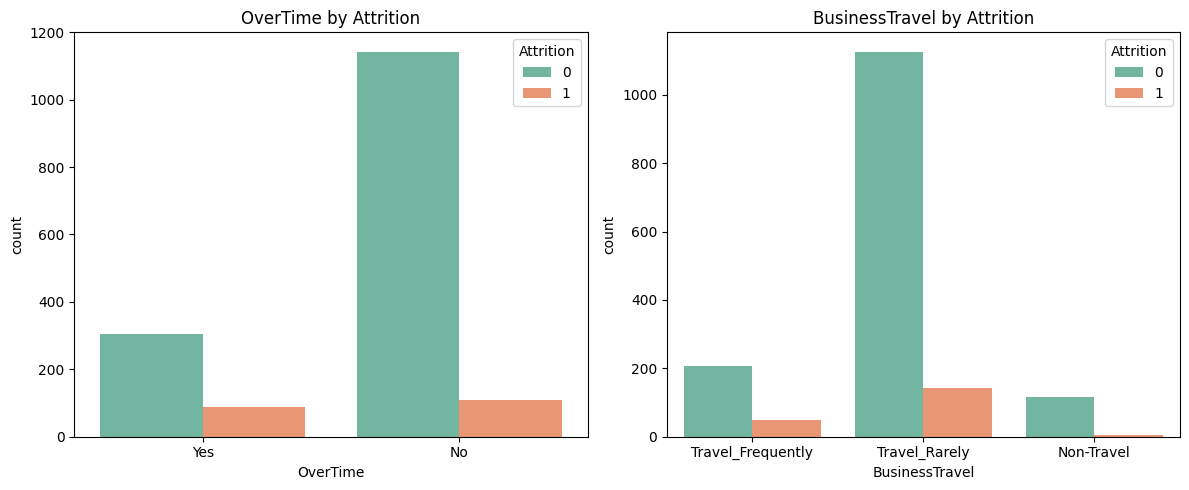


Chi-Square Test Results:
OverTime: Chi-square=52.30, p-value=0.0000 --> Significant
BusinessTravel: Chi-square=21.55, p-value=0.0000 --> Significant


<ipython-input-17-5e83ac16247a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=train_df, palette='Set2')


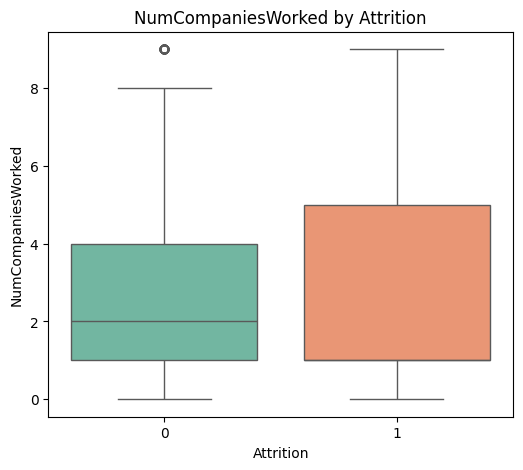

NumCompaniesWorked Mann-Whitney U Test: U-statistic=150313.00, p-value=0.1706 --> Not Significant


In [ ]:
# 범주형 변수 시각화 (OverTime, BusinessTravel)
categorical_vars = ['OverTime', 'BusinessTravel']

plt.figure(figsize=(12,5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, hue='Attrition', data=train_df, palette='Set2')
    plt.title(f'{var} by Attrition')

plt.tight_layout()
plt.show()

# Chi-Square Test for categorical variables
print("\nChi-Square Test Results:")
for var in categorical_vars:
    contingency_table = pd.crosstab(train_df[var], train_df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: Chi-square={chi2:.2f}, p-value={p:.4f} -->",
          "Significant" if p < 0.05 else "Not Significant")

# 연속형 변수(NumCompaniesWorked) 시각화 및 검정
plt.figure(figsize=(6,5))
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=train_df, palette='Set2')
plt.title('NumCompaniesWorked by Attrition')
plt.show()

# Mann-Whitney U test for NumCompaniesWorked
attrition_yes = train_df[train_df['Attrition'] == 1]['NumCompaniesWorked']
attrition_no = train_df[train_df['Attrition'] == 0]['NumCompaniesWorked']
stat, p = mannwhitneyu(attrition_yes, attrition_no, alternative='two-sided')
print(f"NumCompaniesWorked Mann-Whitney U Test: U-statistic={stat:.2f}, p-value={p:.4f} -->",
      "Significant" if p < 0.05 else "Not Significant")

#5️⃣ 가설설정 및 가설검정

##신규 입사자(단기 근속자)의 정의

- ***3년차 미만 직원을 신규 입사자(단기 근속자)***로 정의함 (YearsAtCompany가 0, 1, 2인 직원, TenureEmployee에서 0에 해당하는 직원)
- EDA를 통해 이직(Attrition)을 한 직원들은 회사에 근속한 기간(YearsAtCompany)이 상대적으로 짧았다는 사실을 발견했기 때문에, 신규 입사자를 중심으로 가설을 설정했음
- 이러한 사실을 토대로 신규 입사자(단기 근속자)의 이직에 영향을 주는 원인을 파악하고, 장기 근속을 유도하기 위한 방안을 제시하고자 함

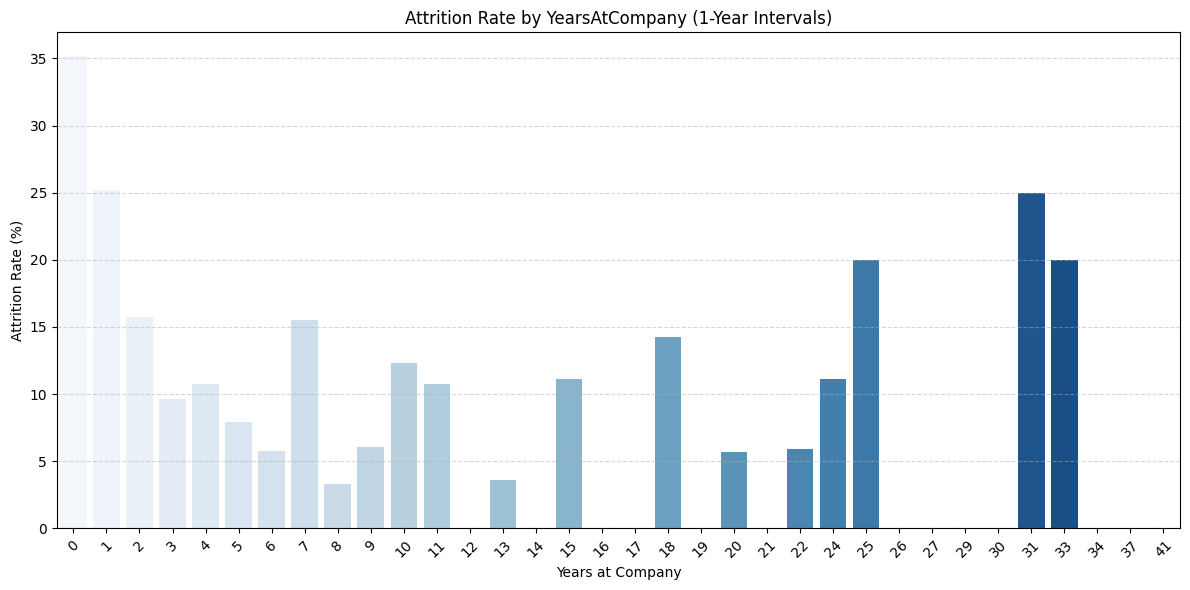

##가설 1: 입사 3년차 미만 직원의 연봉 인상률(PercentSalaryHike)이 낮은 경우 이직률이 높을 것이다.

귀무가설(HO): 입사 3년차 미만 직원 중 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 없다.

***대립가설(H1): 입사 3년차 미만 직원 중 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 있다.*** `채택!`

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
import numpy as np

def newcomer_salary_hike_analysis(df):
    """
    신규 입사자(3년 차 미만) 중 이직자와 잔류자 간 연봉 인상률 차이 검정
    - 귀무가설(H0): 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 없다.
    - 대립가설(H1): 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 있다.
    """
    # 1. 데이터 필터링: 신규 입사자(3년 차 미만)
    newcomers = df[df['TenureEmployee'] == 0]

    print(f"신규 입사자 수: {len(newcomers)}")

    # 이직자와 잔류자 그룹 분리 (집단 구분 코드 없이 직접 입력 가정)
    attrition_group = newcomers[newcomers['Attrition'] == 1]['PercentSalaryHike']
    retention_group = newcomers[newcomers['Attrition'] == 0]['PercentSalaryHike']

    print(f"이직자 수: {len(attrition_group)}, 잔류자 수: {len(retention_group)}")

    # 2. 정규성 검정: Shapiro-Wilk 검정
    print("\n[정규성 검정 (Shapiro-Wilk)]")
    stat_attrition, p_attrition = shapiro(attrition_group)
    stat_retention, p_retention = shapiro(retention_group)
    print(f"이직자 그룹 p-value: {p_attrition:.4e}")
    print(f"잔류자 그룹 p-value: {p_retention:.4e}")

    # 3. 등분산성 검정: Levene 검정
    print("\n[등분산성 검정 (Levene)]")
    stat_levene, p_levene = levene(attrition_group, retention_group)
    print(f"등분산성 검정 p-value: {p_levene:.4e}")

    # 4. 가설 검정: 정규성 여부에 따라 t-test 또는 Mann-Whitney U test
    print("\n[가설 검정 결과]")
    if p_attrition > 0.05 and p_retention > 0.05:
        # 정규성을 만족할 경우: t-test
        equal_var = p_levene > 0.05  # 등분산성 여부 판단
        stat, p_value = ttest_ind(attrition_group, retention_group, equal_var=equal_var)
        test_name = "독립 표본 t-검정"
    else:
        # 정규성을 만족하지 않을 경우: Mann-Whitney U test
        stat, p_value = mannwhitneyu(attrition_group, retention_group)
        test_name = "Mann-Whitney U 검정 (비모수 검정)"

    print(f"{test_name} p-value: {p_value:.4e}")
    if p_value < 0.05:
        print("대립가설 채택: 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 있음")
    else:
        print("귀무가설 채택: 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 없음")

# 분석 실행
newcomer_salary_hike_analysis(train_df)

신규 입사자 수: 369
이직자 수: 86, 잔류자 수: 283

[정규성 검정 (Shapiro-Wilk)]
이직자 그룹 p-value: 2.3022e-08
잔류자 그룹 p-value: 6.3951e-11

[등분산성 검정 (Levene)]
등분산성 검정 p-value: 7.8642e-01

[가설 검정 결과]
Mann-Whitney U 검정 (비모수 검정) p-value: 1.9576e-02
대립가설 채택: 이직자와 잔류자의 연봉 인상률에 유의미한 차이가 있음


- 이직자 수와 잔류자 수의 데이터 불균형 문제를 해결하기 위해 SMOTE를 적용하여 이직자 수와 잔류자 수를 동일하게 맞춤
- 가중치를 부여한 t-검정을 통해 평균 연봉 인상률 비교하고자 했으나, 정규성 검정(Shapiro-Wilk) 결과, 두 그룹 모두 정규성을 만족하지 않음
- t-검정은 정규성 가정을 전제로 하는 평균 비교 방법이므로, 비정규 분포 데이터에서 평균 값의 신뢰성 저하될 수 있음
- 따라서 데이터의 중심 경향을 더 잘 반영하는 중앙값을 활용하여 데이터의 왜곡을 줄이고자 함
- 결론적으로 정규성 가정을 하지 않는 비모수 검정 방법인 **Median Test(중앙값 검정)**을 수행함

In [ ]:
from imblearn.over_sampling import SMOTE
from scipy.stats import median_test

def median_test_analysis(group1, group2):
    """
    두 그룹 간 중앙값 차이를 검정하는 Median Test
    """
    # 중앙값 계산
    median1 = np.median(group1)
    median2 = np.median(group2)

    print(f"이직자 그룹 중앙값: {median1:.2f}")
    print(f"잔류자 그룹 중앙값: {median2:.2f}")

    # Median Test 수행
    stat, p_value, _, _ = median_test(group1, group2)

    print(f"\n[Median Test 결과]")
    print(f"Chi-square value: {stat:.4f}, p-value: {p_value:.4e}")

    if p_value < 0.05:
        print("대립가설 채택: 이직자와 잔류자 간 중앙값에 유의미한 차이가 있음")
    else:
        print("귀무가설 채택: 이직자와 잔류자 간 중앙값에 유의미한 차이가 없음")

# 1. SMOTE 적용
smote = SMOTE(random_state=42)
X = train_df[['RelationshipSatisfaction', 'Age', 'MonthlyIncome']]  # 특성들 예시
y = train_df['Attrition']

X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. 증대된 데이터프레임 생성
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Attrition'] = y_resampled

# 3. 이직자와 잔류자 그룹 나누기
attrition_group = resampled_df[resampled_df['Attrition'] == 1]['RelationshipSatisfaction']
retention_group = resampled_df[resampled_df['Attrition'] == 0]['RelationshipSatisfaction']

# 4. SMOTE로 증대된 이직자와 잔류자 그룹 데이터로 중앙값 검정 수행
median_test_analysis(attrition_group, retention_group)

이직자 그룹 중앙값: 2.00
잔류자 그룹 중앙값: 3.00

[Median Test 결과]
Chi-square value: 234.2823, p-value: 6.9420e-53
대립가설 채택: 이직자와 잔류자 간 중앙값에 유의미한 차이가 있음


이직자와 잔류자 간 연봉 인상률 중앙값에 유의미한 차이가 있음을 확인했으며, 이직자의 연봉 인상률이 잔류자에 비해 전반적으로 낮다는 것을 확인함

###가설 1 인사이트

- 입사 초기(3년 차 미만) 직원들 중 연봉 인상률이 상대적으로 낮은 직원들이 이직할 가능성이 높음
- 이직 방지를 위해 연봉 인상 정책에 대한 관리가 필요함
- 특히, **신규 입사자(3년 차 미만)**에 대해 연봉 인상률을 전략적으로 관리하여 동기부여 강화 및 이직 방지 대책 마련 필요함
- 또한 **연봉 인상률 외에 다른 변수(예: 직무 만족도, 근무 환경 등)**도 함께 고려하여 종합적인 이직 방지 대책을 수립할 필요가 있음

## 가설 2: 입사 3년차 미만 직원의 동료 관계 만족도(RelationshipSatisfaction)가 낮으면 이직률이 높을 것이다.

귀무가설(H0): 입사 3년차 미만 직원의 동료 관계 만족도가 낮은 그룹과 높은 그룹 간 이직률에 유의미한 차이가 없다.

***대립가설(H1): 입사 3년차 미만 직원의 동료 관계 만족도가 낮은 그룹과 높은 그룹 간 이직률에 유의미한 차이가 있다.*** `채택!`

In [ ]:
def chi_square_analysis(df):
    """
    동료 관계 만족도와 이직 여부 간 교차표와 카이제곱 검정 수행
    """
    # 1. 데이터 필터링: 신규 입사자(3년 차 미만)
    newcomers = df[df['TenureEmployee'] == 0]

    # 2. 교차표 작성
    contingency_table = pd.crosstab(newcomers['RelationshipSatisfaction'], newcomers['Attrition'])
    print("\n[교차표]")
    print(contingency_table)

    # 3. 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\n[카이제곱 검정 결과]")
    print(f"Chi-square value: {chi2:.4f}, p-value: {p:.4e}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # 4. 결과 해석
    if p < 0.05:
        print("대립가설 채택: 동료 관계 만족도와 이직 여부 간 유의미한 관계가 있음")
    else:
        print("귀무가설 채택: 동료 관계 만족도와 이직 여부 간 유의미한 관계가 없음")

# 교차표와 카이제곱 검정 수행
chi_square_analysis(train_df)


[교차표]
Attrition                   0   1
RelationshipSatisfaction         
1                          38  28
2                          53  17
3                          91  24
4                         101  17

[카이제곱 검정 결과]
Chi-square value: 19.1438, p-value: 2.5530e-04
Degrees of freedom: 3
Expected frequencies:
Attrition                         0          1
RelationshipSatisfaction                      
1                         50.617886  15.382114
2                         53.685637  16.314363
3                         88.197832  26.802168
4                         90.498645  27.501355
대립가설 채택: 동료 관계 만족도와 이직 여부 간 유의미한 관계가 있음


- 동료 관계 만족도 점수가 낮을수록 이직자 수가 상대적으로 많음
  - 만족도 1 (Low): 28명 이직 (전체의 약 42%)
  - 만족도 2 (Medium): 20명 이직 (전체의 약 27%)
  - 만족도 3 (High): 24명 이직 (전체의 약 21%)
  - 만족도 4 (Very High): 18명 이직 (전체의 약 15%)
- 동료 관계 만족도가 높아질수록 이직자 수가 감소하는 경향이 있음

In [ ]:
import statsmodels.api as sm

def logistic_regression_analysis(df):
    """
    동료 관계 만족도와 이직 여부 간 로지스틱 회귀 분석 수행
    """
    # 1. 데이터 필터링: 신규 입사자(3년 차 미만)
    newcomers = df[df['TenureEmployee'] == 0]

    # 2. 독립 변수와 종속 변수 설정
    X = newcomers[['RelationshipSatisfaction']]  # 독립 변수: 동료 관계 만족도
    X = sm.add_constant(X)  # 절편 추가
    y = newcomers['Attrition']  # 종속 변수: 이직 여부

    # 3. 로지스틱 회귀 분석 수행
    model = sm.Logit(y, X)
    result = model.fit()

    # 4. 결과 출력
    print("\n[로지스틱 회귀 분석 결과]")
    print(result.summary())

    # 5. 해석
    print("\n[해석]")
    p_value = result.pvalues['RelationshipSatisfaction']
    coef = result.params['RelationshipSatisfaction']
    if p_value < 0.05:
        direction = "낮을수록 이직률이 높음" if coef < 0 else "높을수록 이직률이 높음"
        print(f"대립가설 채택: 동료 관계 만족도가 {direction} (p-value: {p_value:.4e})")
    else:
        print(f"귀무가설 채택: 동료 관계 만족도와 이직률 간 유의미한 관계 없음 (p-value: {p_value:.4e})")

# 로지스틱 회귀 분석 수행
logistic_regression_analysis(train_df)

Optimization terminated successfully.
         Current function value: 0.520009
         Iterations 6

[로지스틱 회귀 분석 결과]
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  369
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                 0.04225
Time:                        09:36:46   Log-Likelihood:                -191.88
converged:                       True   LL-Null:                       -200.35
Covariance Type:            nonrobust   LLR p-value:                 3.877e-05
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0369      0.314      0.118      

- 회귀 계수가 -0.4693로 음수이므로, 동료 관계 만족도가 낮을수록 이직 확률이 높음

###가설 2 인사이트

- 입사 초기 동료 관계 형성이 이직 방지의 핵심 요인으로 확인됨
- 이를 바탕으로 팀빌딩 프로그램, 멘토링 제도, 심리적 지원 프로그램을 강화하여 신규 입사자의 조직 적응을 체계적으로 지원할 필요가 있음
- 상사와 동료의 적극적 역할을 강조하여 조직 몰입도와 소속감을 높이는 전략이 중요함

##가설 3: 근속 기간에 따라 이직률에 영향을 주는 변수 중요도의 구성이 다를 것이다.

귀무가설(H0): 근속 기간에 따라 단기, 중기, 장기 근속자의 이직률에 영향을 주는 변수 중요도(로지스틱 회귀 계수 절대값 상위 3개 변수)의 구성에는 유의미한 차이가 없다.

***대립가설(H1): 근속 기간에 따라 단기, 중기, 장기 근속자의 이직률에 영향을 주는 변수 중요도(로지스틱 회귀 계수 절대값 상위 3개 변수)의 구성에는 유의미한 차이가 있다.*** `채택!`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def logistic_importance_by_tenure(df):
    # 결과 저장용 딕셔너리
    results = {}

    # 근속 기간별(TenureEmployee) 분석 (오름차순 정렬)
    tenure_groups = sorted(df['TenureEmployee'].unique())

    for tenure in tenure_groups:
        print(f"\n🔍 근속 기간(TenureEmployee) 분석: {tenure}")
        sub_df = df[df['TenureEmployee'] == tenure]

        # 이직 여부(Attrition) 값 확인
        unique_attrition = sub_df['Attrition'].unique()
        if len(unique_attrition) < 2:
            print(f"⚠️ 근속 기간 {tenure}에는 이직 여부가 한 가지({unique_attrition[0]})로만 구성되어 있어 분석 불가")
            continue

        # 종속 변수와 독립 변수 설정
        X = sub_df.drop(columns=['Attrition', 'TenureEmployee', 'id'])
        y = sub_df['Attrition']

        # 범주형 변수 더미 처리
        X = pd.get_dummies(X, drop_first=True)

        # 데이터 스케일링
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 로지스틱 회귀 모델 학습
        model = LogisticRegression(max_iter=1000, solver='liblinear')
        model.fit(X_scaled, y)

        # 변수 중요도 (계수의 절대값 기준으로 정렬)
        importance = np.abs(model.coef_[0])
        importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(3)

        # 결과 저장
        results[tenure] = importance_df

        print(f"\n🔑 근속 기간 {tenure}의 변수 중요도 (Top 3)")
        print(importance_df)

    # 비교 결과 출력 (오름차순으로 정렬하여 출력)
    print("\n✅ 근속 기간별 변수 중요도 비교")
    for tenure in sorted(results.keys()):
        print(f"\nTenureEmployee {tenure} - Top 3 변수")
        print(results[tenure])

    # 변수 중요도 비교 분석
    top_vars = {tenure: set(imp_df['Variable']) for tenure, imp_df in results.items()}
    common_vars = set.intersection(*top_vars.values())

    if len(common_vars) == 3:
        print("\n=> 귀무가설 채택: 근속 기간에 따라 이직률에 영향을 주는 변수 중요도(Top 3)에 차이가 없다.")
    else:
        print("\n=> 대립가설 채택: 근속 기간에 따라 이직률에 영향을 주는 변수 중요도(Top 3)에 차이가 있다.")

# 분석 실행
logistic_importance_by_tenure(train_df)


🔍 근속 기간(TenureEmployee) 분석: 0

🔑 근속 기간 0의 변수 중요도 (Top 3)
                            Variable  Importance
15                  StockOptionLevel    0.928051
7                           JobLevel    0.868625
24  BusinessTravel_Travel_Frequently    0.713862

🔍 근속 기간(TenureEmployee) 분석: 1

🔑 근속 기간 1의 변수 중요도 (Top 3)
                         Variable  Importance
16              TotalWorkingYears    0.612285
4         EnvironmentSatisfaction    0.610051
35  JobRole_Laboratory Technician    0.578053

🔍 근속 기간(TenureEmployee) 분석: 2

🔑 근속 기간 2의 변수 중요도 (Top 3)
                            Variable  Importance
25      BusinessTravel_Travel_Rarely    0.853369
15                  StockOptionLevel    0.702492
24  BusinessTravel_Travel_Frequently    0.675742

✅ 근속 기간별 변수 중요도 비교

TenureEmployee 0 - Top 3 변수
                            Variable  Importance
15                  StockOptionLevel    0.928051
7                           JobLevel    0.868625
24  BusinessTravel_Travel_Frequently    0.713862

Tenu

###가설 3 인사이트

(이미지 내 숫자 수정 필요...)

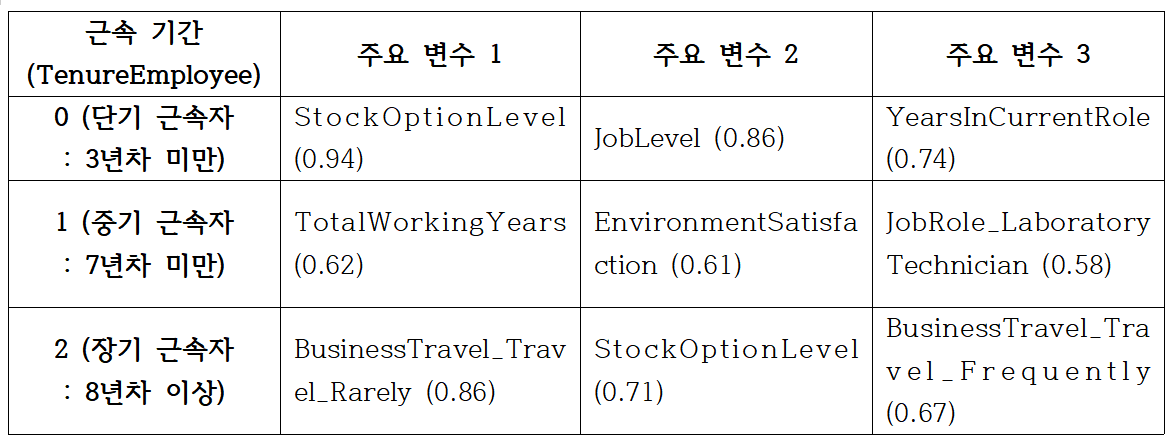

- 단기 근속자 vs. 장기 근속자 → 단기 근속자는 보상 체계와 직급이 중요하고, 장기 근속자는 출장 빈도와 보상이 중요함. 즉, 입사 초반에는 보상과 직급 안정성, 근속 기간이 길어질수록 업무 변동성과 장기 보상이 중요한 변수로 작용함

- 중기 근속자 → 근속 연수 증가와 업무 환경이 중요하여, 중기 근속자에게는 근속 연장 동기 부여와 정서/심리적 안정을 주는 지원이 필요함

- 공통점: 모든 근속 기간에서 보상 관련 변수(StockOptionLevel)가 중요 요소로 나타났으며, 보상 체계 개선이 전반적인 이직률 저감에 도움이 될 수 있음

## 가설 4: 직급에 따라 이직률에 영향을 주는 변수 중요도의 구성이 다를 것이다.

귀무가설(H0): 직급(JobLevel)에 따라 이직률에 영향을 주는 변수 중요도(로지스틱 회귀 계수 절대값 상위 3개 변수)의 구성에는 유의미한 차이가 없다.
→ 사람들의 일반적인 통념: 직급이 다르더라도 퇴사를 하는 이유는 다 비슷비슷하지 않을까?

***대립가설(H1): 직급(JobLevel)에 따라 이직률에 영향을 주는 변수 중요도(로지스틱 회귀 계수 절대값 상위 3개 변수)의 구성에는 유의미한 차이가 있다.*** `채택!`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def logistic_importance_analysis(df):
    # 결과 저장용 딕셔너리
    results = {}

    # 직급(JobLevel)별 분석 (오름차순 정렬)
    job_levels = sorted(df['JobLevel'].unique())

    for level in job_levels:
        print(f"\n🔍 직급(JobLevel) 분석: {level}")
        sub_df = df[df['JobLevel'] == level]

        # 이직 여부(Attrition) 값 확인
        unique_attrition = sub_df['Attrition'].unique()
        if len(unique_attrition) < 2:
            print(f"⚠️ 직급 {level}에는 이직 여부가 한 가지({unique_attrition[0]})로만 구성되어 있어 분석 불가")
            continue

        # 종속 변수와 독립 변수 설정
        X = sub_df.drop(columns=['Attrition', 'JobLevel', 'id'])
        y = sub_df['Attrition']

        # 범주형 변수 더미 처리
        X = pd.get_dummies(X, drop_first=True)

        # 데이터 스케일링
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 로지스틱 회귀 모델 학습
        model = LogisticRegression(max_iter=1000, solver='liblinear')
        model.fit(X_scaled, y)

        # 변수 중요도 (계수의 절대값 기준으로 정렬)
        importance = np.abs(model.coef_[0])
        importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(3)

        # 결과 저장
        results[level] = importance_df

        print(f"\n🔑 직급 {level}의 변수 중요도 (Top 3)")
        print(importance_df)

    # 비교 결과 출력 (오름차순으로 정렬하여 출력)
    print("\n✅ 직급별 변수 중요도 비교")
    for level in sorted(results.keys()):
        print(f"\nJobLevel {level} - Top 3 변수")
        print(results[level])

    # 변수 중요도 비교 분석
    top_vars = {level: set(imp_df['Variable']) for level, imp_df in results.items()}
    common_vars = set.intersection(*top_vars.values())

    if len(common_vars) == 3:
        print("\n=> 귀무가설 채택: 직급에 따라 이직률에 영향을 주는 변수 중요도(Top 3)에 차이가 없다.")
    else:
        print("\n=> 대립가설 채택: 직급에 따라 이직률에 영향을 주는 변수 중요도(Top 3)에 차이가 있다.")

# 분석 실행
logistic_importance_analysis(train_df)


🔍 직급(JobLevel) 분석: 1

🔑 직급 1의 변수 중요도 (Top 3)
                            Variable  Importance
18                    YearsAtCompany    0.828771
14                  StockOptionLevel    0.821985
24  BusinessTravel_Travel_Frequently    0.670557

🔍 직급(JobLevel) 분석: 2

🔑 직급 2의 변수 중요도 (Top 3)
                Variable  Importance
14      StockOptionLevel    0.644643
42          OverTime_Yes    0.591141
41  MaritalStatus_Single    0.483226

🔍 직급(JobLevel) 분석: 3

🔑 직급 3의 변수 중요도 (Top 3)
              Variable  Importance
0                  Age    1.219355
10  NumCompaniesWorked    0.833400
23      TenureEmployee    0.810652

🔍 직급(JobLevel) 분석: 4

🔑 직급 4의 변수 중요도 (Top 3)
                   Variable  Importance
10       NumCompaniesWorked    0.561503
4   EnvironmentSatisfaction    0.509731
34          JobRole_Manager    0.395893

🔍 직급(JobLevel) 분석: 5

🔑 직급 5의 변수 중요도 (Top 3)
                     Variable  Importance
3                   Education    0.578412
34  JobRole_Research Director    0.523346


###가설 4 인사이트

(이미지 내 숫자 수정 필요...)

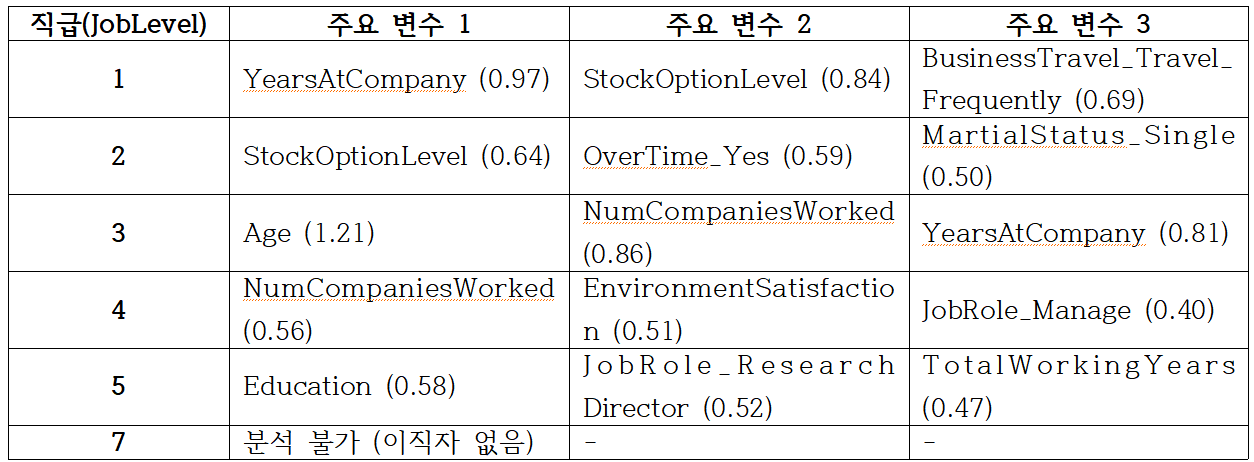

- 직급 간 공통적으로 이직에 영향을 미치는 변수는 없으며, 직급이 높아질수록 역할과 책임에 따라 이직 원인이 다른 것을 확인
- 초급/중급(Level 1~2): 업무 환경 및 보상 요인이 주요 변수 (스톡옵션, 초과 근무, 출퇴근 거리)
- 관리자급(Level 3~4): 개인 특성과 경험 요인이 주요 변수 (나이, 근속 연수)
- 고급/임원(Level 5 이상): 역할 및 직무 특성이 주요 변수 (직무 유형, 총 근무 기간)

##가설 5: 같은 직무(JobRole) 내에서 초과근무를 한 직원의 월급은 초과근무를 하지 않은 직원의 월급보다 더 많을 것이다.

***귀무가설(H0): 같은 직무 내에서 초과근무 여부에 따라 급여 격차 비율(SalaryGapRatio)에는 차이가 없다.*** `채택!`

대립가설(H1): 같은 직무 내에서 초과근무를 한 직원의 급여 격차 비율(SalaryGapRatio)에는 차이가 있다.

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
import pandas as pd

def jobrole_overtime_salary_analysis(df):
    """
    같은 직무(JobRole) 내에서 초과근무 여부에 따른 SalaryGapRatio 차이 검정
    """
    # 직무 목록
    job_roles = df['JobRole'].unique()

    # 직무별 초과근무 여부 검정
    for job in job_roles:
        print(f"\n 직무: {job}")

        # 해당 직무 데이터 필터링
        job_df = df[df['JobRole'] == job]

        # 초과근무 여부 그룹 나누기
        overtime_yes = job_df[job_df['OverTime'] == 'Yes']['SalaryGapRatio'].dropna()
        overtime_no = job_df[job_df['OverTime'] == 'No']['SalaryGapRatio'].dropna()

        # 그룹 크기 확인
        if len(overtime_yes) < 2 or len(overtime_no) < 2:
            print("데이터 부족으로 검정 불가능")
            continue

        print(f"초과근무 Yes 수: {len(overtime_yes)}, No 수: {len(overtime_no)}")

        # 정규성 검정
        p_yes = shapiro(overtime_yes)[1]
        p_no = shapiro(overtime_no)[1]
        print(f"정규성 검정 - OverTime=Yes: p-value={p_yes:.4e}, OverTime=No: p-value={p_no:.4e}")

        # 등분산성 검정
        p_lev = levene(overtime_yes, overtime_no)[1]
        print(f"등분산성 검정 - p-value={p_lev:.4e}")

        # 검정 선택
        if p_yes > 0.05 and p_no > 0.05:
            if p_lev > 0.05:
                # 정규성 & 등분산성 만족 -> t-test
                stat, p = ttest_ind(overtime_yes, overtime_no, equal_var=True)
                test_name = "t-test (Equal Variance)"
            else:
                # 정규성 만족 & 등분산성 불만족 -> Welch's t-test
                stat, p = ttest_ind(overtime_yes, overtime_no, equal_var=False)
                test_name = "Welch's t-test"
        else:
            # 정규성 불만족 -> Mann-Whitney U Test
            stat, p = mannwhitneyu(overtime_yes, overtime_no, alternative='two-sided')
            test_name = "Mann-Whitney U Test"

        # 결과 출력
        print(f"{test_name} 결과: stat={stat:.2f}, p-value={p:.4e}")
        if p < 0.05:
            print(f"=> 대립가설 채택: 직무 '{job}' 내에서 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 있음")
        else:
            print(f"=> 귀무가설 채택: 직무 '{job}' 내에서 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 없음")

# 분석 실행
jobrole_overtime_salary_analysis(train_df)


 직무: Laboratory Technician
초과근무 Yes 수: 78, No 수: 251
정규성 검정 - OverTime=Yes: p-value=7.5930e-03, OverTime=No: p-value=1.9822e-10
등분산성 검정 - p-value=6.2049e-01
Mann-Whitney U Test 결과: stat=10405.00, p-value=4.0156e-01
=> 귀무가설 채택: 직무 'Laboratory Technician' 내에서 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 없음

 직무: Sales Representative
초과근무 Yes 수: 13, No 수: 62
정규성 검정 - OverTime=Yes: p-value=9.4045e-02, OverTime=No: p-value=5.0357e-04
등분산성 검정 - p-value=1.0508e-01
Mann-Whitney U Test 결과: stat=492.00, p-value=2.1546e-01
=> 귀무가설 채택: 직무 'Sales Representative' 내에서 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 없음

 직무: Sales Executive
초과근무 Yes 수: 88, No 수: 256
정규성 검정 - OverTime=Yes: p-value=1.0160e-11, OverTime=No: p-value=9.3506e-13
등분산성 검정 - p-value=4.8048e-01
Mann-Whitney U Test 결과: stat=10551.50, p-value=3.7631e-01
=> 귀무가설 채택: 직무 'Sales Executive' 내에서 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 없음

 직무: Healthcare Representative
초과근무 Yes 수: 39, No 수: 112
정규성 검정 - OverTime=Yes: p-value=1.2740e-10, OverTime=No: p-valu

<ipython-input-25-8d50d5dc1dc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverTime', y=var, data=df, palette='Set2')


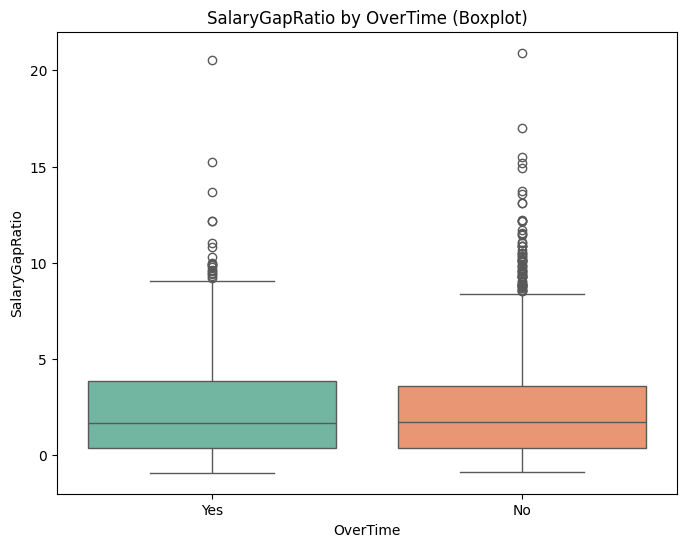


 통계적 유의성 검정 for SalaryGapRatio
정규성 검정 - OverTime=Yes: p-value=9.2978e-19, OverTime=No: p-value=8.2468e-32
등분산성 검정 - p-value=3.9026e-01
Mann-Whitney U Test 결과: stat=247739.50, p-value=8.7514e-01
=> 귀무가설 채택: 초과근무 여부에 따라 SalaryGapRatio에 유의미한 차이가 없다.



In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

def salary_gap_ratio_analysis(df):
    # 변수 목록
    var = 'SalaryGapRatio'

    # 초과근무 여부 그룹 나누기
    overtime_yes = df[df['OverTime'] == 'Yes']
    overtime_no = df[df['OverTime'] == 'No']

    # 1. 분포 시각화
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='OverTime', y=var, data=df, palette='Set2')
    plt.title(f'{var} by OverTime (Boxplot)')
    plt.show()

    # 2. 통계적 유의성 검정
    print(f"\n 통계적 유의성 검정 for {var}")

    # 두 그룹 데이터
    group_yes = overtime_yes[var].dropna()
    group_no = overtime_no[var].dropna()

    # 정규성 검정
    stat_yes, p_yes = shapiro(group_yes)
    stat_no, p_no = shapiro(group_no)
    print(f"정규성 검정 - OverTime=Yes: p-value={p_yes:.4e}, OverTime=No: p-value={p_no:.4e}")

    # 등분산성 검정
    stat_lev, p_lev = levene(group_yes, group_no)
    print(f"등분산성 검정 - p-value={p_lev:.4e}")

    # 검정 선택
    if p_yes > 0.05 and p_no > 0.05:
        if p_lev > 0.05:
            # 정규성 & 등분산성 만족 -> t-test
            stat, p = ttest_ind(group_yes, group_no, equal_var=True)
            test_name = "t-test (Equal Variance)"
        else:
            # 정규성 만족 & 등분산성 불만족 -> Welch's t-test
            stat, p = ttest_ind(group_yes, group_no, equal_var=False)
            test_name = "Welch's t-test"
    else:
        # 정규성 불만족 -> Mann-Whitney U Test
        stat, p = mannwhitneyu(group_yes, group_no, alternative='two-sided')
        test_name = "Mann-Whitney U Test"

    print(f"{test_name} 결과: stat={stat:.2f}, p-value={p:.4e}")
    if p < 0.05:
        print(f"=> 대립가설 채택: 초과근무 여부에 따라 {var}에 유의미한 차이가 있다.\n")
    else:
        print(f"=> 귀무가설 채택: 초과근무 여부에 따라 {var}에 유의미한 차이가 없다.\n")

# 분석 실행
salary_gap_ratio_analysis(train_df)

- 정규성 검정 (Shapiro-Wilk) 결과, 두 그룹 모두 p-value < 0.05이므로, 정규성을 만족하지 않음
- SalaryGapRatio는 비정규 분포를 가지므로 평균 비교보다는 중앙값 비교가 더 적절함

In [ ]:
# 초과근무 여부에 따른 SalaryGapRatio 중앙값 비교 (Median Test)

def salary_gap_ratio_median_test(df):
    # 변수 설정
    var = 'SalaryGapRatio'

    # 초과근무 여부 그룹 나누기
    overtime_yes = df[df['OverTime'] == 'Yes'][var].dropna()
    overtime_no = df[df['OverTime'] == 'No'][var].dropna()

    # 중앙값 계산
    median_yes = overtime_yes.median()
    median_no = overtime_no.median()

    print(f"초과근무 Yes의 중앙값: {median_yes:.4f}")
    print(f"초과근무 No의 중앙값: {median_no:.4f}")

    # Median Test 수행
    stat, p_value, _, _ = median_test(overtime_yes, overtime_no)

    print(f"\n[Median Test 결과]")
    print(f"Chi-square value: {stat:.4f}, p-value: {p_value:.4e}")

    # 결과 해석
    if p_value < 0.05:
        print("대립가설 채택: 초과근무 여부에 따라 SalaryGapRatio의 중앙값에 유의미한 차이가 있음")
    else:
        print("귀무가설 채택: 초과근무 여부에 따라 SalaryGapRatio의 중앙값에 유의미한 차이가 없음")

# Median Test 실행
salary_gap_ratio_median_test(train_df)

초과근무 Yes의 중앙값: 1.6745
초과근무 No의 중앙값: 1.7438

[Median Test 결과]
Chi-square value: 0.0756, p-value: 7.8330e-01
귀무가설 채택: 초과근무 여부에 따라 SalaryGapRatio의 중앙값에 유의미한 차이가 없음


###가설 5 인사이트

**1) 초과근무 보상 체계의 공정성 확보**
- 같은 직무 내 초과근무 여부에 따라 실질적인 월급 차이를 반영할 필요가 있음
- 야근이나 초과근무를 많이 한 직원이 공정하게 보상받을 수 있도록 성과급 또는 추가 수당 체계를 개선해야 함
- 또한 직무 특성상 초과근무가 잦은 직군일수록(가령 HR), 기본급 대비 비율이 아닌 추가 인센티브 제도 도입을 검토할 필요가 있음

**2) 부서 간 성과급 격차 조정 필요**
- 여러 부서가 협력하여 하나의 목표를 달성하는 구조라면, 부서별로 과도한 성과급 격차가 없도록 관리해야 함
- 성과에 기여한 정도를 명확히 평가하되, 부서 간 지나치게 차이가 나는 급여 구조는 공정성 논란을 유발할 수 있음
- 공동 목표 달성에 기여한 모든 부서의 노력을 인정하는 보상 체계를 구축하는 것이 중요함

##클러스터링

최종 선택한 변수: 'TenureEmployee' (파생변수), 'PercentSalaryHike', 'RelationshipSatisfaction', 'JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole'
앞에서 진행한 EDA 및 가설검정 기반으로 변수 선택한 후, 몇 개는 제거했고 제거한 이유는 코드에 주석으로 적어놨습니다!

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 이직자만 필터링
df_attrited = train_df[train_df['Attrition'] == 1].copy()

# 사용할 변수만 선택
selected_columns = [
    'TenureEmployee',         # 파생변수!
    'PercentSalaryHike',
    #'StockOptionLevel',   #대부분 0~1에 몰려있어서 설명력 약함
    'RelationshipSatisfaction',
    #'EnvironmentSatisfaction',  #해석상 강한 효과가 없었음
    'JobLevel',
    'TotalWorkingYears',
    #'Age',   #TotalWorkingYears와 강한 상관 + 해석력이 떨어짐
    'YearsInCurrentRole',
    #'BusinessTravel'  #분포 쏠림이 심하고, 영향력이 낮을 수 있음
]

df_selected = df_attrited[selected_columns].copy()


# 범주형 변수 One-Hot Encoding
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded)

# DataFrame 형태로 변환
df_scaled = pd.DataFrame(scaled, columns=df_encoded.columns)


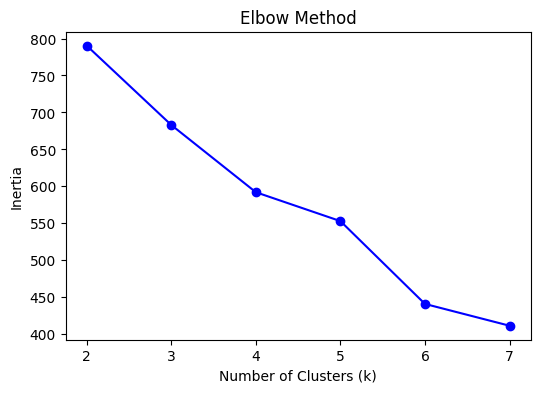

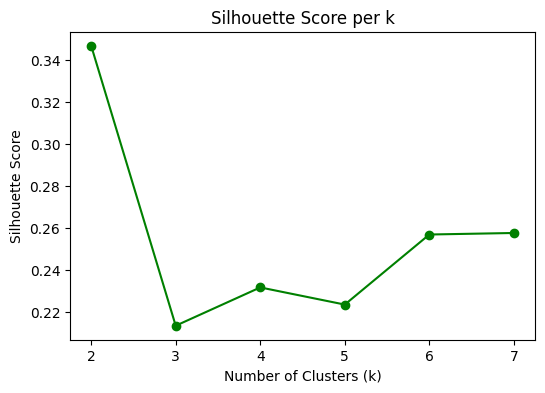

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

# Elbow Method 시각화
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score 시각화
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per k')
plt.show()


군집의 수 2로 설정

In [ ]:
optimal_k = 2


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# 결과를 원래 train_df에 저장
train_df.loc[df_attrited.index, 'Cluster'] = kmeans_labels

In [ ]:
df_attrited['Cluster'] = train_df.loc[df_attrited.index, 'Cluster']


Cluster Profile 출력

In [ ]:
# df_encoded.columns 중 df_attrited에 존재하는 컬럼만 선택
safe_columns = [col for col in df_encoded.columns if col in df_attrited.columns]

# 클러스터별 평균값 보기
cluster_profile = df_attrited.groupby('Cluster')[safe_columns].mean().round(2)
display(cluster_profile)

# 각 클러스터 인원 수 보기
print(df_attrited['Cluster'].value_counts())


,TenureEmployee,PercentSalaryHike,RelationshipSatisfaction,JobLevel,TotalWorkingYears,YearsInCurrentRole
Cluster,,,,,,
0.0,0.42,14.73,2.47,1.27,5.41,1.14
1.0,1.89,14.21,2.56,2.42,14.33,7.19


Cluster
0.0    139
1.0     57
Name: count, dtype: int64


이 값들은 PPT에 표로 정리해서 올려주세요!

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score (k={optimal_k}): {score:.4f}")


Silhouette Score (k=2): 0.3467


실루엣 스코어: 0.3467

인간 행동 데이터에서 0.34면 꽤 잘 분리됐.. (합리화 아님)

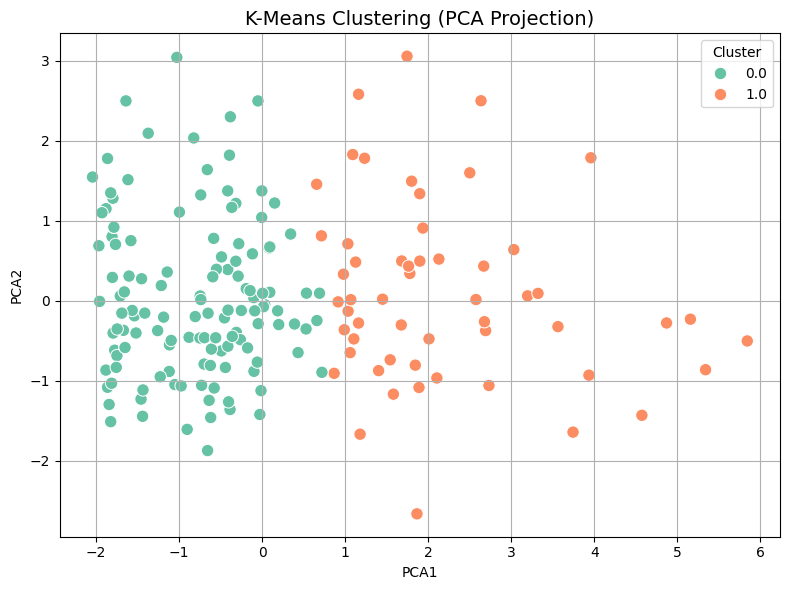

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 수행
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

# 결과 저장
df_attrited['PCA1'] = components[:, 0]
df_attrited['PCA2'] = components[:, 1]

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_attrited,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2', s=80
)
plt.title('K-Means Clustering (PCA Projection)', fontsize=14)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 클러스터별로 중심과 가장 차이나는(=특징적인) 변수 확인
top_features = (
    cluster_profile
    .apply(lambda x: abs(x - x.mean()))
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print("클러스터를 가장 잘 나눈 변수 Top 5:")
print(top_features)


클러스터를 가장 잘 나눈 변수 Top 5:
TotalWorkingYears     4.460
YearsInCurrentRole    3.025
TenureEmployee        0.735
JobLevel              0.575
PercentSalaryHike     0.260
dtype: float64


PCA는 선형 투영이기 때문에, 데이터의 비선형적인 군집 구조를 잘 못 잡을 수도 있음.
t-SNE 이용한 시각화

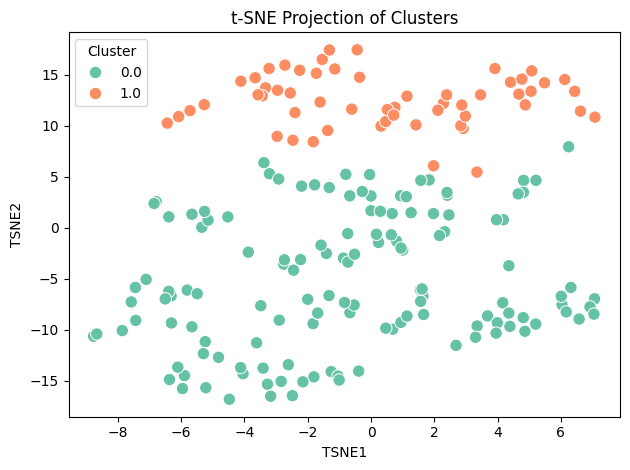

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

df_attrited['TSNE1'] = tsne_result[:, 0]
df_attrited['TSNE2'] = tsne_result[:, 1]

sns.scatterplot(
    data=df_attrited,
    x='TSNE1', y='TSNE2',
    hue='Cluster', palette='Set2', s=80
)
plt.title('t-SNE Projection of Clusters')
plt.tight_layout()
plt.show()


**각 클러스터별 설명**  


1️⃣초기 적응 실패형
- 특징: 젊음, 관계 낮음, 역할 짧음
- 대응 전략: 멘토링, 관계 형성, 초반 온보딩 강화   

2️⃣장기 근속 탈락형
- 특징: 고연차, 높은 직급, 역할 정체
- 대응 전략: 직무 순환, 리프레시, 성장 로드맵 제시

혹시 저 초록색 군집에 주황색이 왜 있는지 궁금할 수 있으니까...   

주황색 점들은 장기 근속 탈락형이지만, 일부는 초기형 특성도 갖고 있는 혼합적 케이스

오히려 이 사람들이 조직 입장에서 가장 위험한 집단일수도     
→ “예상하지 못한 이탈” 가능성

인간 행동 데이터에서 자연스러운 현상이라고 생각함

#6️⃣ 결론 및 해결방안

PPT 자료 참고하시면 될 것 같습니다.

감사합니다!